In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import *

In [3]:
path ='C:\\Users\\onur.bilgic\\Desktop\\00_Onur_Bilgiç\\08_Education\\08_Optimization\\OptimizationStudyGroup\\optimization_study\\coinor\\Cbc-2.10.0-win32-msvc14\\bin\\cbc.exe'

In [ ]:
#https://jckantor.github.io/ND-Pyomo-Cookbook/

# Doğrusal Programlama Nedir ?

## Giapetto'nun Oyuncak Atölyesi

In [185]:
class üretim_süreci():
    
    def __init__(self,ad,süre=0):
        self.ad=ad
        self.süre=süre
      
    
    def __str__(self):
        return self.ad

In [186]:
class ürün():
    
        def __init__(self,ad):
            self.ad=ad
            self.talep_adet=np.inf
            self.stok_adet=0
            self.satış_adet=0
            
        def maliyet_fonksiyonu(self,hammadde_maliyeti,işçilik_maliyeti):
            self.hammadde_maliyeti=hammadde_maliyeti
            self.işçilik_maliyeti=işçilik_maliyeti
            self.maliyet=self.hammadde_maliyeti+self.işçilik_maliyeti
            return self.maliyet
            
        def kar_fonksiyonu(self,satış_fiyatı):
            self.satış_fiyatı=satış_fiyatı
            self.kar=self.satış_fiyatı-self.maliyet
            return self.kar
            
        def üretim_süreçleri(self,süreçler):
            self.üretim_süresi= sum([i.süre for i in süreçler])
            return self.üretim_süresi

        def talep_fonksiyonu(self,adet=np.inf):
            self.talep_adet=adet
            return self.talep_adet 
        
        def üretim_fonskiyonu(self,adet):
            self.üretim= adet
            self.toplam_üretim_süresi=self.üretim*self.üretim_süresi
            return self.üretim
                
        def stok_fonksiyonu(self,adet=0):
            self.stok_adet=adet
            return self.stok_adet
            
        def satış_fonksiyonu(self,adet=0):
            self.satış_adet=adet
            return self.satış_adet
            
        def toplam_gelir_fonksiyonu(self):
            self.toplam_gelir_=self.satış_adet*self.kar
            return self.toplam_gelir_
        
        def toplam_maliyet_fonksiyonu(self):
            self.toplam_maliyet=self.satış_adet*self.kar
            return self.toplam_maliyet
            
        def toplam_kar_fonksiyonu(self):
            self.toplam_kar=self.satış_adet*self.kar
            return self.toplam_kar
            
        def __str__(self):
            return self.ad

In [187]:
asker_oyuncak=ürün('asker oyuncak')
asker_oyuncak.maliyet_fonksiyonu(10,14);
print("Asker oyuncak karı :",asker_oyuncak.kar_fonksiyonu(27))

Asker oyuncak karı : 3


In [188]:
tren_oyuncak=ürün('tren oyuncak')
tren_oyuncak.maliyet_fonksiyonu(9,10);
print("Tren oyuncak karı : ",tren_oyuncak.kar_fonksiyonu(21))

Tren oyuncak karı :  2


In [189]:
asker_doğrama=üretim_süreci('asker doğrama',1)
asker_cila=üretim_süreci('asker cila',2)
print("Asker oyuncak üretim süresi :",asker_oyuncak.üretim_süreçleri([asker_doğrama,asker_cila]))

Asker oyuncak üretim süresi : 3


In [190]:
tren_doğrama=üretim_süreci('tren doğrama',1)
tren_cila=üretim_süreci('tren cila',1)
print("Tren oyuncak üretim süresi : ",tren_oyuncak.üretim_süreçleri([tren_doğrama,tren_cila]))

Tren oyuncak üretim süresi :  2


In [191]:
toplam_doğrama_süresi=80
toplam_cila_süresi=100

In [192]:
asker_oyuncak.talep_fonksiyonu(40)

40

In [193]:
print("Asker oyuncak haftalık talep : ",asker_oyuncak.talep_adet)

Asker oyuncak haftalık talep :  40


In [194]:
print("Tren oyuncak haftalık talep : ",tren_oyuncak.talep_adet)

Tren oyuncak haftalık talep :  inf


<p> Kaç adet tren ve kaç adet asker oyuncak üretmelidir ki karını maksimize hale getirebilsin ? </p>

Karar Değişkenleri :
* Üretilecek Oyuncak Tren Adedi
* Üretilecek Oyuncak Asker Adedi

Amaç Fonskiyonu :
* Doğrusal Programlama'da karı maksimize etmek  veya maliyeti minimize etmek üzerine kullanılan fonskiyonlara <b> amaç fonskiyonu </b> denir. 
    
* Giapetto satamayacağı ürünü üretmeyeceği için , bütün üretimin satılacağı farz ediyoruz. 

Öyleyse  Amaç  fonskiyonumuz:

In [195]:
def amaç_fonskiyonu(asker_oyuncak,tren_oyuncak):
    return asker_oyuncak.kar*asker_oyuncak.üretim + tren_oyuncak.kar * tren_oyuncak.üretim

In [196]:
# üretim miktarları
asker_oyuncak.üretim_fonskiyonu(40)
tren_oyuncak.üretim_fonskiyonu(20)

20

In [197]:
# amaç
amaç_fonskiyonu(asker_oyuncak,tren_oyuncak)

160

* asker_oyuncak.kar # katsayı
* tren_oyuncak.kar  # katsayı


Kısıtlar  :

    Olabildiğince üretimi artırarak kar elde etmek istesekte aşağıdaki kısıtlar yüzünden bu mümkün değildir.
    
* Kısıt 1 - Toplam doğrama süresi 80 saatten fazla olamaz.
* Kısıt 2 - Toplam cilalama süresi 100 saaten fazla olamaz. 
* Kısıt 3 -  En fazla 40 adet asker satabiliriz.

kısıt1
 * asker_doğrama.süre*asker_oyuncak.üretim + tren_doğrama.süre * tren_oyuncak.üretim =<80

kısıt2
 * asker_cila.süre*asker_oyuncak.üretim + tren_cila.süre * tren_oyuncak.üretim=<100

kısıt3
 * asker_oyuncak.üretim=<40

Not:
* Kısıtlarda değişkenlerin katsayınalarına teknolojik katsayı denilir. Örneğin asker_cila.süre bir teknolojik katsayıdır.
* Kısıtların sağ tarafındaki değerlere rhs (right hand side) denir. Eldeki ulaşılabilir kaynağı göstermektedir.

* Karar değişkenleri negatif olmaması veya tam sayı olması da bir kısıttır. Negatif olmaması sr (sign restriction) veya olması (unrestricted in sign) urs.


* asker_oyuncak.üretim>=0 - sr
* tren_oyuncak.üretim>=0 - sr

<b> Optimizasyon Modeli  </b>

* <b> maksimize </b>  asker_oyuncak.kar*asker_oyuncak.üretim + tren_oyuncak.kar * tren_oyuncak.üretim (amaç)

Aşağıdakilere tabidir
    
    * asker_doğrama.süre*asker_oyuncak.üretim + tren_doğrama.süre * tren_oyuncak.üretim =<80 (doğrama kısıtı)
    * asker_cila.süre*asker_oyuncak.üretim + tren_cila.süre * tren_oyuncak.üretim=<100 (cila kısıtı)
    * asker_oyuncak.üretim=<40 (asker kısıtı)
    * asker_oyuncak.üretim>=0 (negatiflik kısıtı)
    * tren_oyuncak.üretim>=0 (negatiflik kısıtı)

<b> Doğrusal Fonskiyon </b>

c1, c2, . . . , cn, f (x1, x2, . . . , xn) = c1x1 + c2x2 +.....+ cnxn. 

    * Değişkenlerin üssü 1 veya 0 olmalıdır.

<b> Doğrusal Eşitsizlikler </b>

f(x1,x2, . . . , xn) =< b ve f (x1, x2, . . . , xn) => b 
* Değişkenlerin üssü 1 veya 0 olmalıdır.

**Doğrusal Programlama Problemleri**nde aşağıdaki adımlar izlenerek sonuçlar bulunur.,
* 1 - Maksimizasyon ve minimizasyon yapmak için değişkenleriyle oynadığımız fonksiyona amaç fonskiyonu denir.
* 2 - Karar değişkenlerinin değerleri kısıtları sağlamalıdır. Herbir doğrusal denklem veya eşitsizlik için geçerlidir.
* 3 - Negatiflik durumu her bir değişken için geçerlidir.

**Oransallık ve Eklenebilirlik Kabulleri** 
* Her bir karar değişkeninin etkisi değeri ile orantılıdır.
* Her bir karar değişkenin etkisi diğer karar değişkenlerinden bağımsızdır.

Bu kabuller Doğrusal Programlamanın yapılabilmesi için şarttır.

**Bölülenebilirlik Kabulu**

Tren adedi 5.2 olabileceği veya asker adedi 3.5 olabileceği kabul edilir.Eğer kabul edilmiyorsa yani tam sayı olmaları gerekirse bu soru **Tamsayı Programlama Problemine** dönüşür.


**Kesinlik Kabulu**

Değişkenler dışındaki bütün parametrelerin bilindiği kabul edilmiştir.

**Uygulanabilir Bölge**

40 asker ve 20 tren Giapetto'nun atölyesi için uygunalabilir değerlerdir. Çünkü bütün kısıtları karşılıyorlar.

In [198]:
asker_oyuncak.üretim_fonskiyonu(40)
tren_oyuncak.üretim_fonskiyonu(20)

20

In [199]:
asker_doğrama.süre*asker_oyuncak.üretim + tren_doğrama.süre * tren_oyuncak.üretim <=80 # (doğrama kısıtı)

True

In [200]:
asker_cila.süre*asker_oyuncak.üretim + tren_cila.süre * tren_oyuncak.üretim  <=100#  (cila kısıtı)

True

In [201]:
asker_oyuncak.üretim<=40 # (asker kısıtı)

True

In [202]:
asker_oyuncak.üretim>=0 # (negatiflik kısıtı)

True

In [203]:
tren_oyuncak.üretim>=0 # (negatiflik kısıtı)

True

In [204]:
asker_oyuncak.üretim_fonskiyonu(15)
tren_oyuncak.üretim_fonskiyonu(70)


70

In [205]:
asker_doğrama.süre*asker_oyuncak.üretim + tren_doğrama.süre * tren_oyuncak.üretim <=80 # (doğrama kısıtı)

False

**En İyi Çözüm**

Maksimizasyonda amaç fonskiyonunu en fazla yapan ve kısıtlara uyan karar değişkenleridir. Minimizasyonda ise en düşük yapan ve aynı şekilde kısıtlara uyan karar değişkenleridir.

**Çözüm Durumu**
* Tek çözüm
* Sonsuz Çözüm
* Çözümsüz

### Sorular

#### Soru 1 


In [206]:
acre
wheat 
bushel
labor

NameError: name 'acre' is not defined

In [ ]:
1 acre_wheat 25 bushel wheat 10 hour
1 acre_corn  10 bushel corn  4 hour

1 bushel wheat 4
1 bushel corn  3

In [ ]:
1 week 40 hours
7 acres 

In [ ]:
corn>=30 bushel

   
**maksimize** x1\*3\*10+x2\*4\*25

* x1+x2=7
* x1\*4+x2\*10<=40
* x1*10>=30
* x2>=0


#### Soru 2 


##### a

In [ ]:
x1=2;x2=3
x1+x2==7

##### b

In [ ]:
def çözüm_bölgesi(x1,x2):
    x=0
    print(x)
    x+=x1+x2==7
    print(x)
    x+=x1*4+x2*10<=40
    print(x)
    x+=x1>=3
    print(x)
    x+=x2>=0
    print(x)
    
    if x==5:
        return True
    else:
        return False

In [ ]:
x1=4;x2=3
çözüm_bölgesi(x1,x2)

##### c

In [ ]:
x1=2;x2=-1
çözüm_bölgesi(x1,x2)

##### d

In [ ]:
x1=3;x2=2
çözüm_bölgesi(x1,x2)

#### Soru 3 

* x1 =  bushel corn 
* x2 =  bushel of wheat

**maksimize** x1\*3+x2\*4

*   x1/10+x2/25=7
*   x1/10\*4+x2/25\*10<=40
*   x1>=30
*   x2>=0

#### Soru 4

**maksimize** t1\*300+t2\*500

* painting
 
    t1/800+t2/700<=1
    
*  assembling
 
    t1/1500+t2/1200<=1
    
* sign
     
     t1>=0
     t2>=0
    

    

#### Soru 5

< ve > kısıtlarına izin verilmemesinin sebebi , kenarları belirli bir uzay-(çözüm kümesi) yaratabilmek için olabilir.

## İki Değişkenli Doğrusal Programlama Sorunun Görsel Çözümü 

 2x1 + 3x2 <= 6

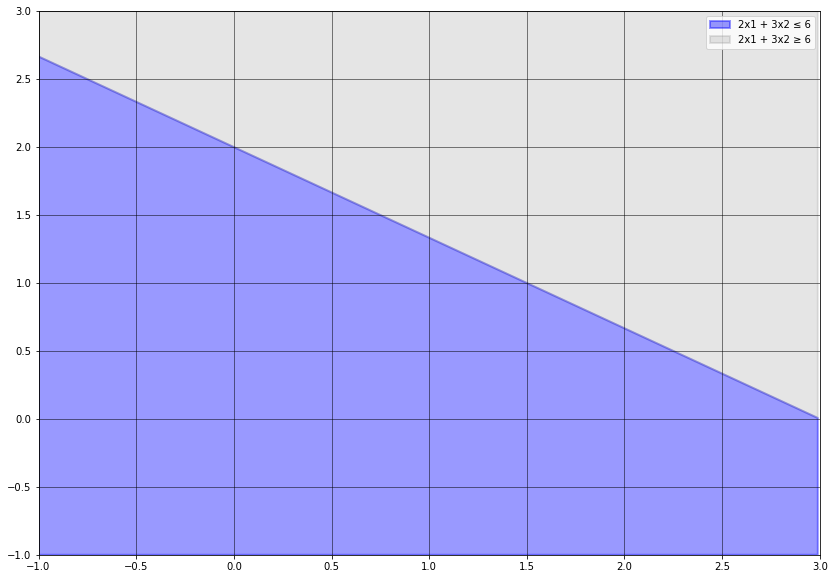

In [359]:
x1=np.arange(-3, 3, 0.01)
x2=(6-2*x1)/3
x_bottom=-1
y_bottom=-1
x_top=3
y_top=3
fig, ax = plt.subplots(figsize=(14, 10))
ax.fill_between(x1,x_bottom ,  x2,color='blue', lw=2, alpha=0.4)
ax.fill_between(x1, x2, y_top ,color='grey', lw=2, alpha=0.2)
ax.legend(['2x1 + 3x2 ≤ 6','2x1 + 3x2 ≥ 6'])
ax.set_ylim(y_bottom, y_top)
ax.set_xlim(x_bottom, x_top)
ax.grid(color='black', linestyle='-', linewidth=0.5);

**Uygun Çözüm Bulabilmek**

Giapetto'nun Problemi

* 2x1 + x2 <= 100 
* x1  + x2 <= 80 
* x1       <= 40 
* x1       >= 0 
*       x2 >= 0 

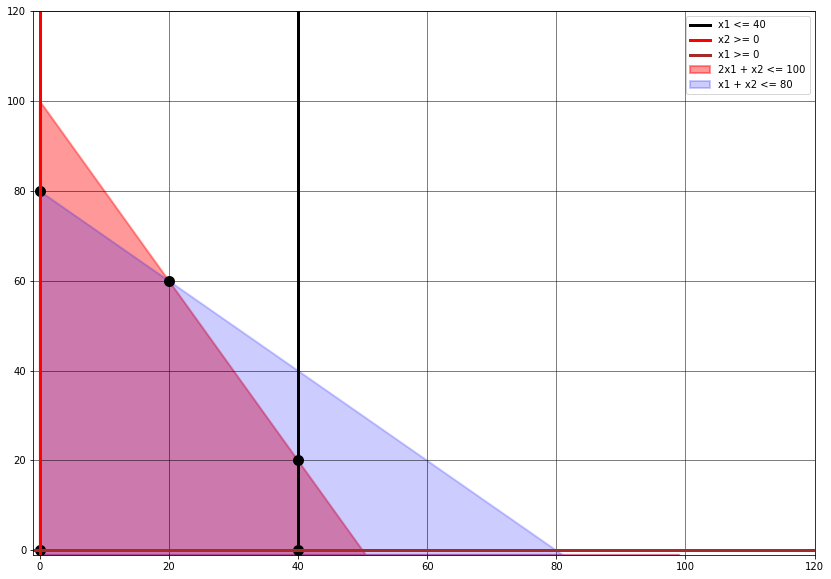

In [567]:
x_bottom=-1
y_bottom=-1
x_top=120
y_top=120

fig, ax = plt.subplots(figsize=(14, 10))

x1=np.arange(0, 100, 1)
x2=100-2*x1

ax.fill_between(x1,x_bottom ,  x2,color='red', lw=2, alpha=0.4)

x2=80-x1

ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=2, alpha=0.2)

ax.axvline(40, lw=3,color='black' )

ax.axvline(0, lw=3,color='red' )

ax.axhline(0, lw=3,color='brown' )
ax.scatter([0],[80],lw=5,color='black',marker='o')
ax.scatter([20],[60],lw=5,color='black',marker='o')
ax.scatter([40],[20],lw=5,color='black',marker='o')
ax.scatter([40],[0],lw=5,color='black',marker='o')
ax.scatter([0],[0],lw=5,color='black',marker='o')
ax.legend(['x1 <= 40','x2 >= 0','x1 >= 0','2x1 + x2 <= 100','x1 + x2 <= 80'],loc='upper right')
ax.set_ylim(y_bottom, y_top)
ax.set_xlim(x_bottom, x_top)
ax.grid(color='black', linestyle='-', linewidth=0.5)

Amaç fonskiyonunu da görsele eklemek gerekiyor. 
* z = 3 \* x1 + 2 \* x2


Bu çizeceğimiz doğru ile onu paralelde oynatarak optimal çözümü bulabiliriz. 

In [608]:
def çizdir(a,b):
    x_bottom=-1
    y_bottom=-1
    x_top=120
    y_top=120

    fig, ax = plt.subplots(figsize=(14, 10))

    x1=np.arange(0, 100, 1)
    x2=100-2*x1

    ax.fill_between(x1,x_bottom ,  x2,color='red', lw=2, alpha=0.4)

    x2=80-x1

    ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=2, alpha=0.2)

    ax.axvline(40, lw=3,color='black' )

    ax.axvline(0, lw=3,color='red' )

    ax.axhline(0, lw=3,color='brown' )
    ax.scatter([0],[80],lw=5,color='black',marker='o')
    ax.scatter([20],[60],lw=5,color='black',marker='o')
    ax.scatter([40],[20],lw=5,color='black',marker='o')
    ax.scatter([40],[0],lw=5,color='black',marker='o')
    ax.scatter([0],[0],lw=5,color='black',marker='o')
  
    ax.legend(['x1 <= 40','x2 >= 0','x1 >= 0','2x1 + x2 <= 100','x1 + x2 <= 80'],loc='upper right')
    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=3*a+2* b
    x=np.arange(0, 100, 1)
    y=(z-3*x)/2
    ax.plot(x,  y,color='green', lw=5)

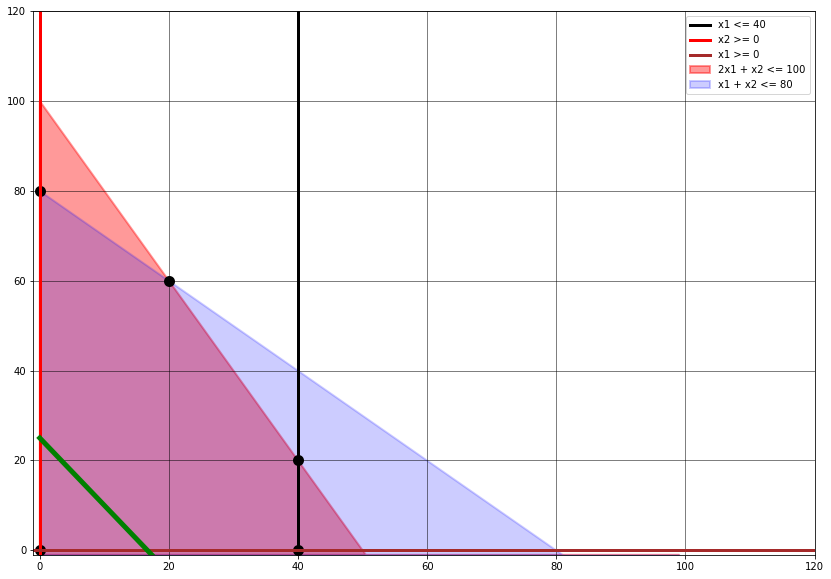

In [609]:
çizdir(10,10)

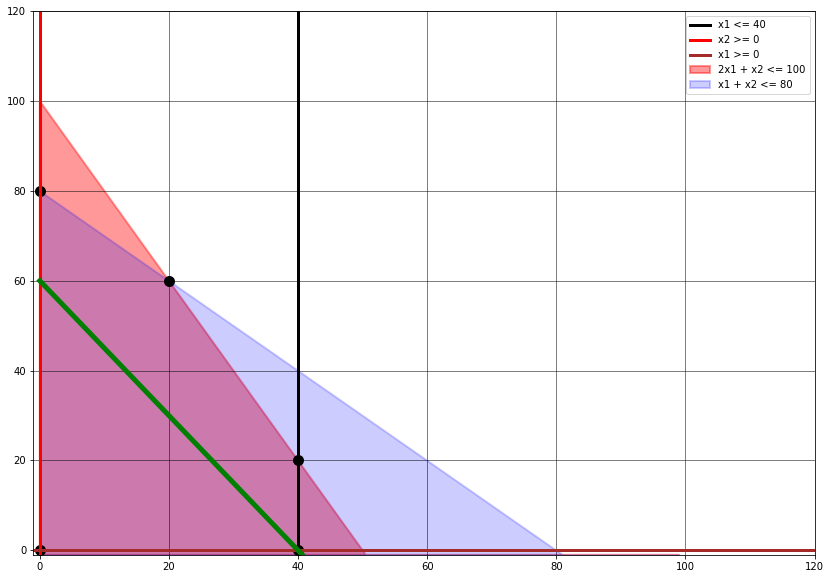

In [610]:
çizdir(40,0)

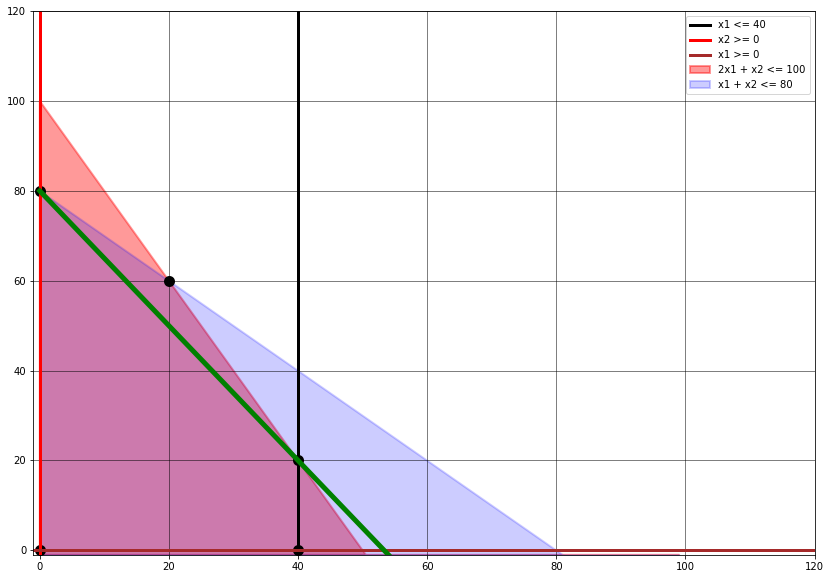

In [611]:
çizdir(0,80)

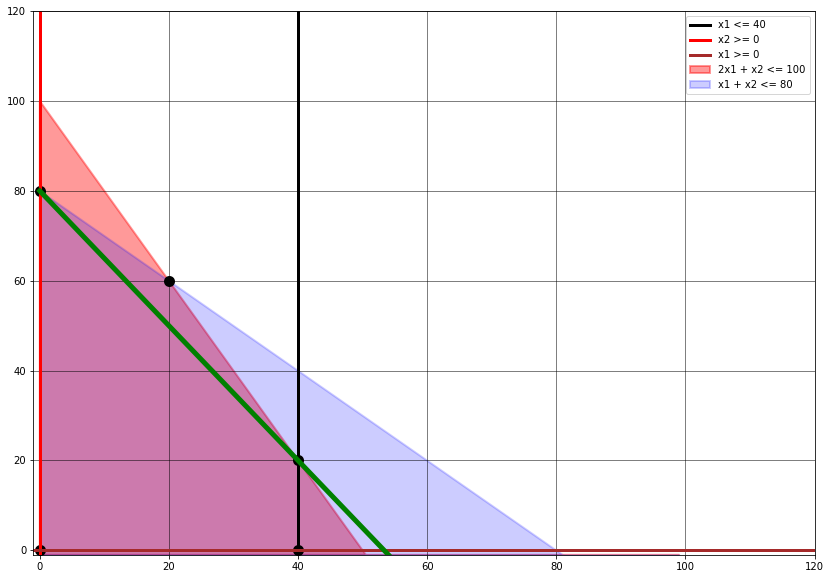

In [613]:
çizdir(40,20)

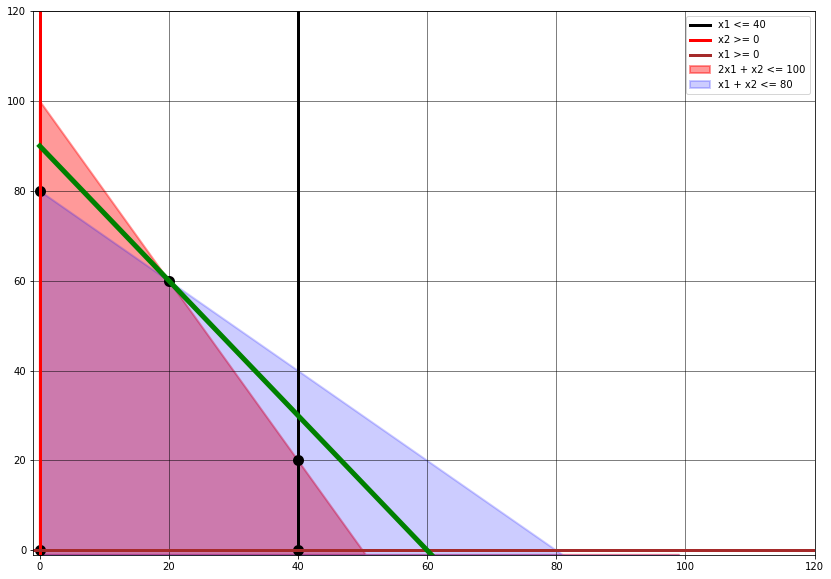

In [614]:
çizdir(20,60)

**Bağlayıcı ve Bağlayıcı Olmayan Kısıtlar**
* Bağlayıcı kısıtlar optimal çözümde eşitliğin sağ ve solu eşit olan kısıtlardır.
    * '2x1 + x2 <= 100'
    * 'x1 + x2 <= 80'
* Eşitliğin sağ ve solu eşit olmayan kısıtlar ise bağlayıcı olmayan kısıtlardır.       
    * 'x1 <= 40',
    * 'x2 >= 0',
    * 'x1 >= 0',

**Dışbukey , Uç Noktalar, ve Doğrusal Programlama**
* Eğer oluşan çözüm kümesinin noktaları bir birbirine doğrusal parçalarla bağlanabiliyorsa buna dışbükey küme diyoruz. Üstteki sorun böyleydi.
* Dışbukey bir kümenin en sonunda kalan noktalara ekstrem noktalar denir. Bu noktaların bir ismi de kenar noktalardır. Üstlerinden bir doğru geçmez. Doğru parçasının genelde son noktasıdırlar. Bu noktalar sayesinde çözüm alanımız azalır.

Not: **Eğer soru doğrusal değilse ekstrem noktalarda çözüm oluşmaz.**

https://www.isaacslavitt.com/2014/06/20/linear-optimization-in-python/

**Minimasyon Problemlerinin Grafiksel Çözümleri**



**Dorian Auto Minimizasyon Problemi**

Yüksek gelirli kadın ve erkekler:

Komedi : 
k:7 m izleyici
e:2 m izleyici

Futbol:
k:2 m izleyici
e:12 m izleyici 

Masraf

Komedi : 50k \$

Futbol : 100  \$

Hedef

k:28 m izleyici
e:24 m izleyici



x1 = komedi reklam
x2 = futbol reklam

**Amaç Fonksiyonu**

minimize : 50\*x1+100\*x2

kısıtlar:
* 7\*x1+2\*x2>=28
* 2\*x1+12\*x2>=24
* x1>=0
* x2>=0

In [27]:
def çizdir(a,b):
    x_bottom=-1
    y_bottom=-1
    x_top=20
    y_top=20

    fig, ax = plt.subplots(figsize=(14, 10))

    x1=np.arange(0, 20, 1)
    x2=(28-7*x1)/2

    ax.fill_between(x1,x2,x_top ,color='red', lw=2, alpha=0.4)

    x2=(24-2*x1)/12

    ax.fill_between(x1, x2,x_top ,color='blue', lw=2, alpha=0.2)


    ax.axvline(0, lw=3,color='red' )

    ax.axhline(0, lw=3,color='brown' )
    
  
    ax.legend(['7*x1+2*x2>=28','2*x1+12*x2>=24','x1 >= 0','x2 >= 0','50*x1+100*x2'],loc='upper right')
    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=50*a+100* b
    x=np.arange(0, 10, 1)
    y=(z-50*x)/100
    ax.plot(x,  y,color='green', lw=5)

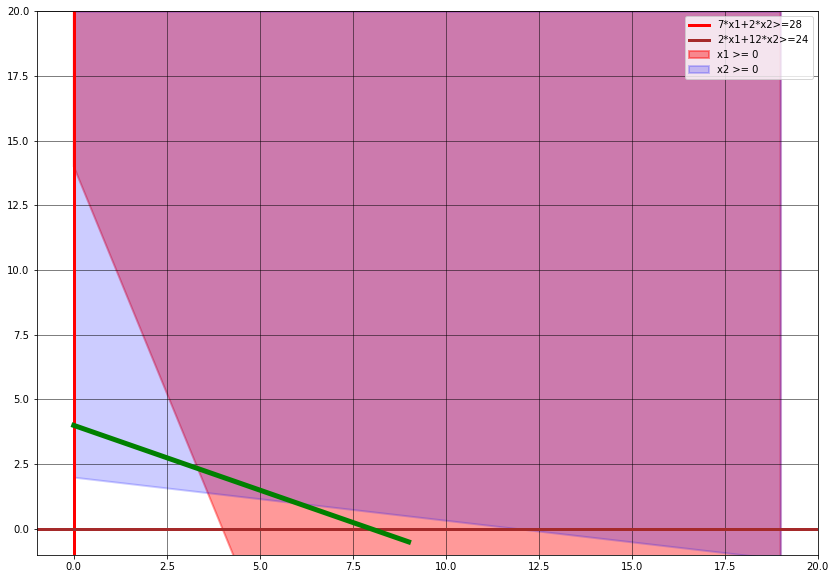

In [34]:
çizdir(4,2)


In [33]:
50*4+100* 2

400

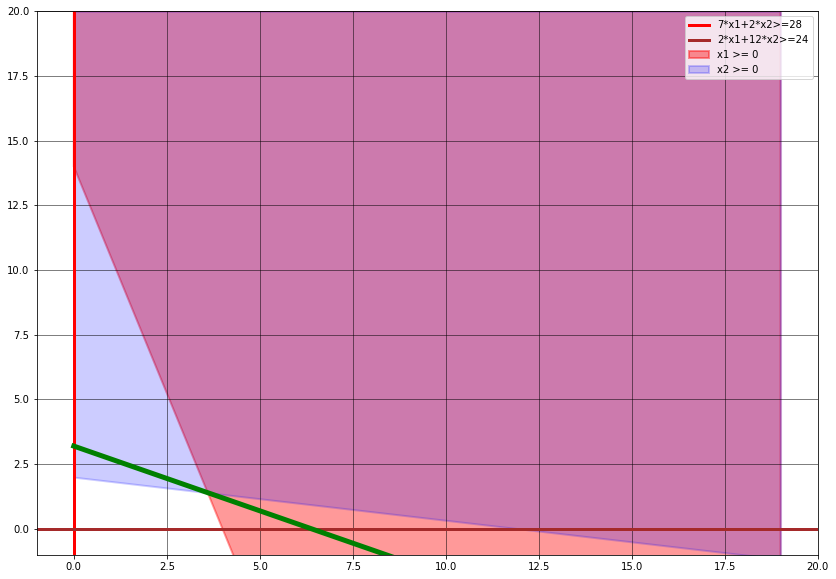

In [35]:
çizdir(3.6,1.4)

In [29]:
a=np.array([[7,2],[2,12]])
b=np.array([[28],[24]])

In [30]:
np.linalg.solve(a,b)

array([[3.6],
       [1.4]])

In [32]:
50*3.6+100* 1.4

320.0

Giapetto problemi gibi dış bukey olmasına rağmen **çözüm alanı sınırsız**dır.

* Eklenebilirlik kabulu söz konusu değildir. İki reklam aynı kişi tarafından izlenebilir.
* Bölünebilirlik kuralı söz konusu değildir. Reklamlar tam sayı olabilir.

### Sorular

#### Soru 1 

**maksimize** x1\*3\*10+x2\*4\*25

* x1+x2=7
* x1\*4+x2\*10<=40
* x1*10>=30
* x2>=0

In [43]:
def çizdir(a,b):
    x_bottom=-1
    y_bottom=-1
    x_top=10
    y_top=10

    fig, ax = plt.subplots(figsize=(14, 10))

    x1=np.arange(0, 20, 1)
    x2=7-x1

    ax.fill_between(x1,x_bottom ,  x2,color='red', lw=2, alpha=0.4)

    x2=(40-4*x1)/10

    ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=2, alpha=0.2)

    ax.axvline(3, lw=3,color='black' )

    ax.axvline(0, lw=3,color='red' )

    ax.axhline(0, lw=3,color='brown' )
      
    ax.legend(['x1+x2=7','x1*4+x2*10<=40','x1*10>=30','x2>=0'],loc='upper right')
    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=30*a+100* b
    x=np.arange(0,20, 1)
    y=(z-30*x)/100
    ax.plot(x,  y,color='green', lw=5)

In [46]:
a=np.array([[1,1],[4,10]])
b=np.array([[7],[40]])

np.linalg.solve(a,b)


array([[5.],
       [2.]])

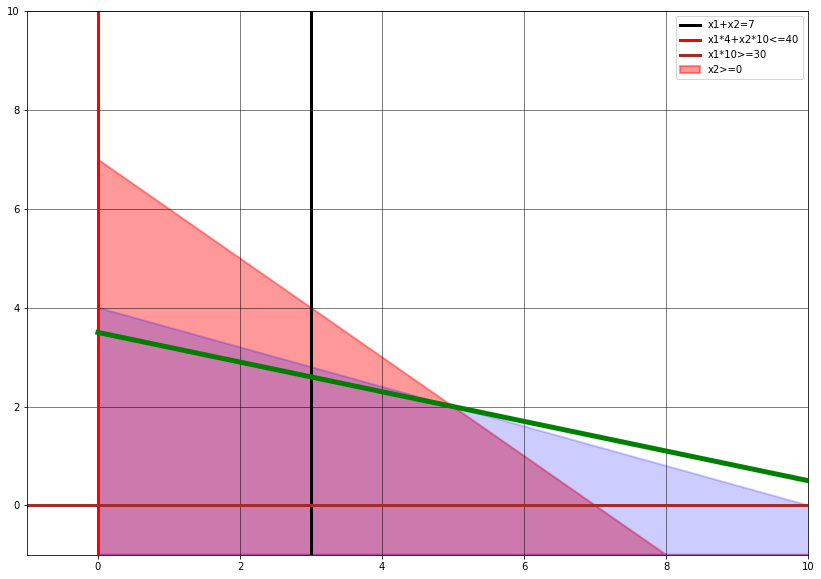

In [45]:
çizdir(5,2)

#### Soru 2 

**maksimize** t1\*300+t2\*500

* painting
 
    t1/800+t2/700<=1
    
*  assembling
 
    t1/1500+t2/1200<=1
    
* sign
     
     t1>=0
     t2>=0

In [79]:
def çizdir(a,b):
    x_bottom=-1
    y_bottom=-1
    x_top=2000
    y_top=1300

    fig, ax = plt.subplots(figsize=(14, 10))

    x1=np.arange(0,2000, 1)
    x2=(1-x1/800)*700

    ax.fill_between(x1,x_bottom ,  x2,color='red', lw=5, alpha=0.4)

    x2=(1-x1/1500)*1200

    ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=5, alpha=0.2)

    ax.axvline(0, lw=3,color='red' )

    ax.axhline(0, lw=3,color='brown' )
      
    ax.legend(['t1/800+t2/700<=1','t1/1500+t2/1200<=1','t1>=0','t2>=0'],loc='upper right')
    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=300*a+500* b
    print(z)
    x=np.arange(0,1500, 1)
    y=(z-300*x)/500
    ax.plot(x,  y,color='green', lw=5)

0


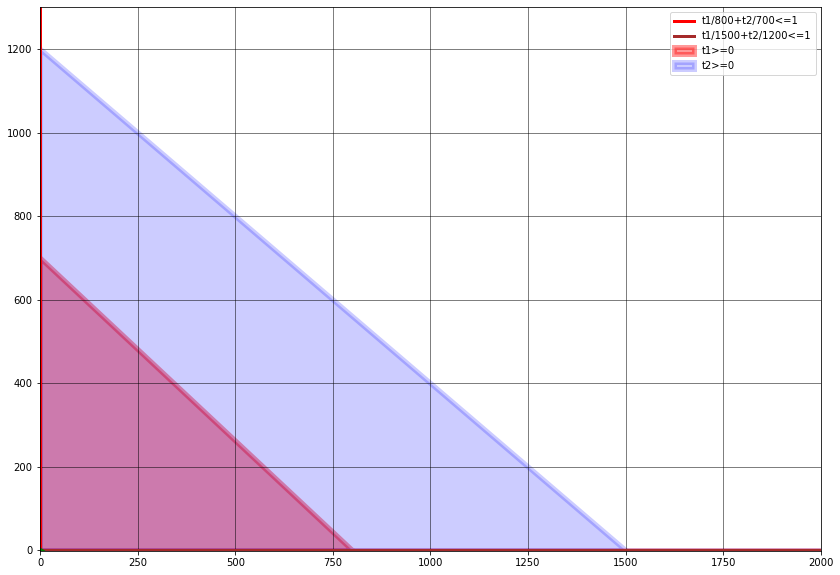

In [80]:
çizdir(0,0)

350000


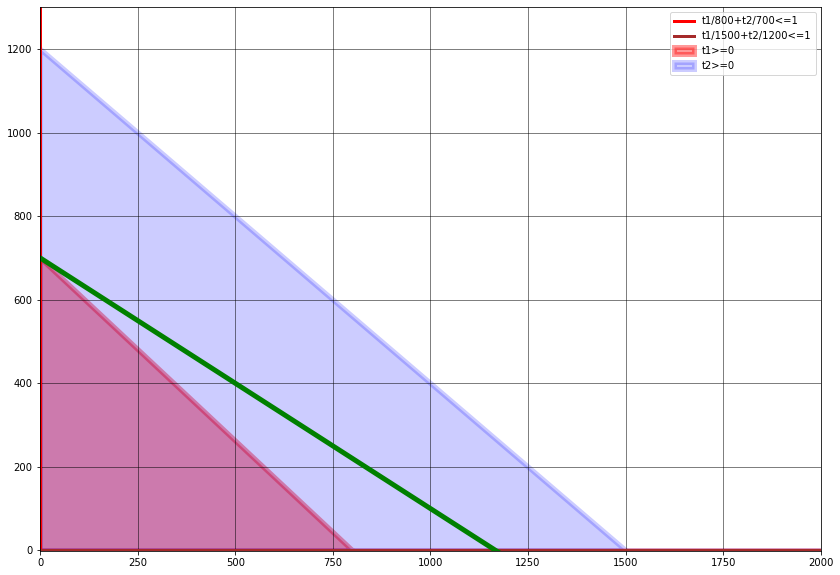

In [81]:
çizdir(0,700)

240000


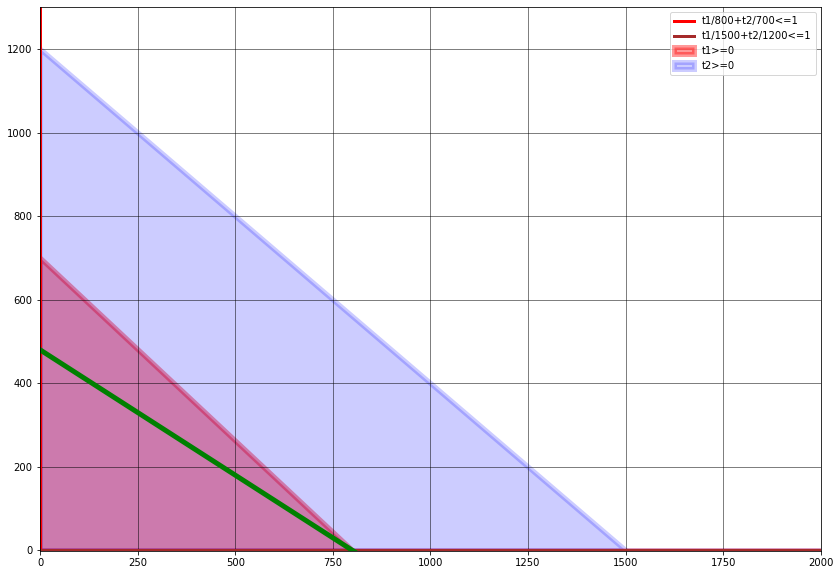

In [82]:
çizdir(800,0)

#### Soru 3 

**minimize**
* x1\*4+x2

**kısıtlar**
*    3x1 +x2 >= 10
*    x1 + x2 >= 5
*    x1   >= 3

*    x1    >= 0
*    x2    >= 0



In [101]:
def çizdir(a,b):
    x_bottom=-1
    y_bottom=-1
    x_top=15
    y_top=15

    fig, ax = plt.subplots(figsize=(14, 10))

    x1=np.arange(0, 20, 1)
    x2=10-3*x1

    ax.fill_between(x1,x2,x_top ,color='red', lw=2, alpha=0.4)

    x2=5-x1

    ax.fill_between(x1, x2,x_top ,color='blue', lw=2, alpha=0.2)

    ax.axvline(0, lw=3,color='red' )

    ax.axhline(0, lw=3,color='brown' )
    
    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=4*a+ b
    x=np.arange(0, 20, 1)
    y=z-4*x
    print("amaç : ",z)
    ax.plot(x,  y,color='green', lw=5)
    ax.legend(['x2 >= 0','x1 >= 0','x1*4+x2','3x1 +x2 >= 10','x1 + x2 >= 5','x1 >= 3'],loc='upper right')

amaç :  14


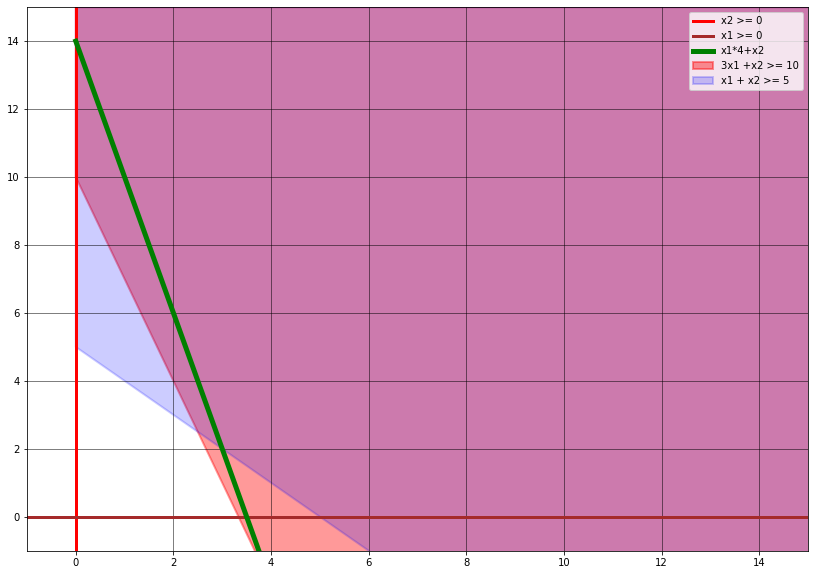

In [109]:
çizdir(1,10)

amaç :  12.5


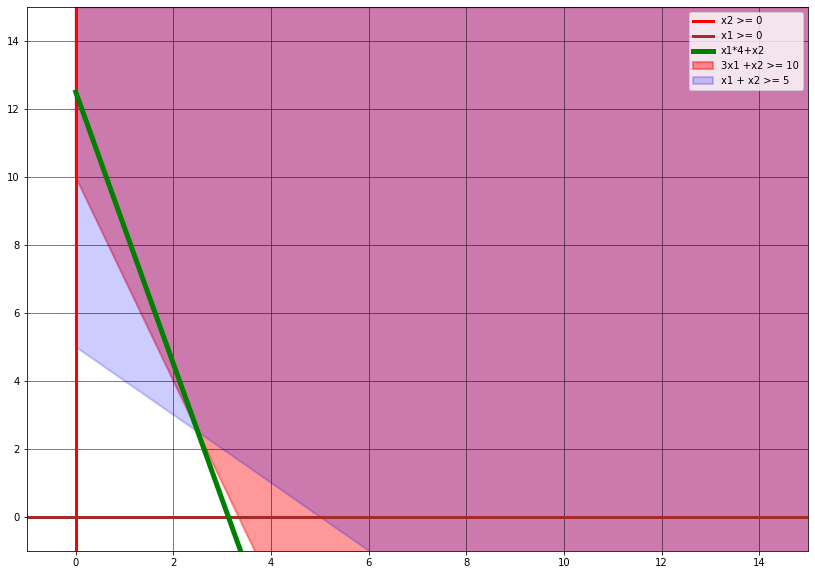

In [103]:
çizdir(2.5,2.5)

#### Soru 4

* a  z = 4 * x1 - x2  --- x1 arttırır maks, x2 azaltır min 
* b  z = - x1 + 2 * x2 --- x2 arttırır maks, x1 azaltır min 
* c  z = - x1 - 3 * x2 --- x1 arttırır maks, x2 azaltır min 

#### Soru 5

**maksimize** x1\*40+x2\*25

**kısıtlar**
 
*  x1/4 +x2/3=20
*  -2 * x1 +  x2>=0
   
*    x1>=0
*     x2>=0

In [120]:
def çizdir(a,b):
    x_bottom=-1
    y_bottom=-1
    x_top=100
    y_top=100

    fig, ax = plt.subplots(figsize=(14, 10))

    x1=np.arange(x_bottom,x_top, 1)
    x2=(20-x1/4)*3

    ax.fill_between(x1,x_bottom ,  x2,color='red', lw=5, alpha=0.4)

    x2= x1*2

    ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=5, alpha=0.2)

    ax.axvline(0, lw=3,color='red' )

    ax.axhline(0, lw=3,color='brown' )
      
    ax.legend(['x2>=0','x1>=0','x1 / 4 +x2 / 3=20','-2 * x1 + x2>=0'],loc='upper right')
    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=40*a+25* b
    print(z)
    x=np.arange(x_bottom,x_top, 1)
    y=(z-40*x)/25
    ax.plot(x,  y,color='green', lw=5)

450


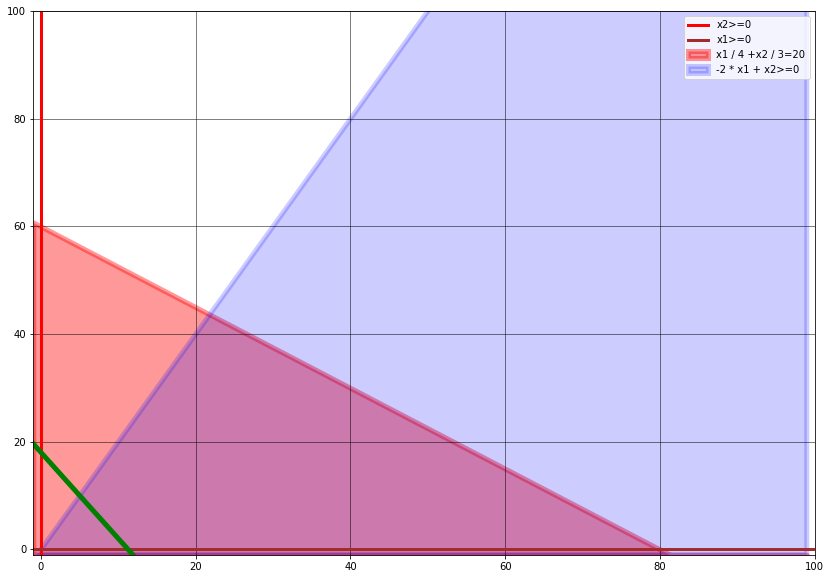

In [121]:
çizdir(5,10)

In [122]:
a=np.array([[1/4,1/3],[-2,1]])
b=np.array([[20],[0]])

np.linalg.solve(a,b)

array([[21.81818182],
       [43.63636364]])

1963.6363638


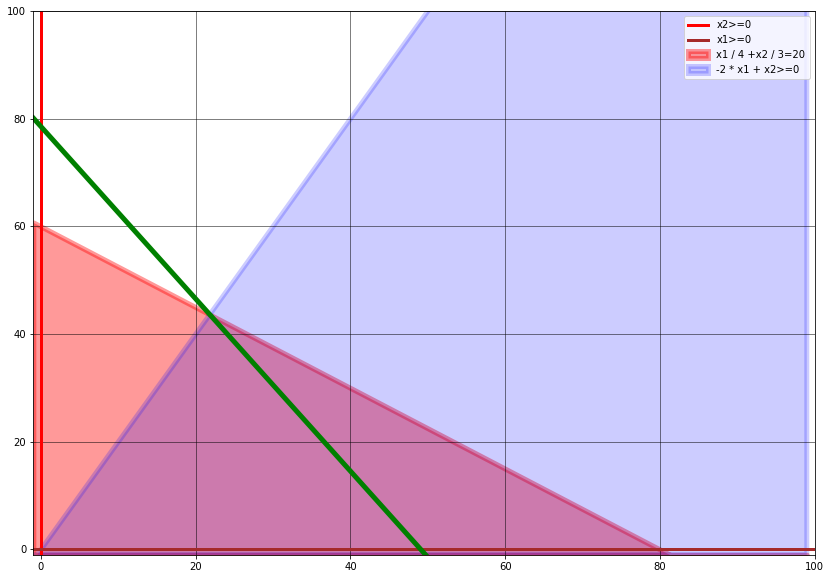

In [123]:
çizdir(21.81818182,43.63636364)

#### Soru 6

**maksimize** x1 * 200 + x2 * 300

**kısıtlar**
 
*  x1 * 2 + x2 * 4=120
*  x1 * 3 + x2 * 2=100
*  x1+x2=45
    
*  x1>=0
*  x2>=0



In [138]:
def çizdir(a,b):
    x_bottom=-1
    y_bottom=-1
    x_top=80
    y_top=80

    fig, ax = plt.subplots(figsize=(14, 10))

    x1=np.arange(x_bottom,x_top, 1)
    x2=(120-x1*2)/4

    ax.fill_between(x1,x_bottom ,  x2,color='red', lw=5, alpha=0.4)

    x2=(100-x1*3)/2

    ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=5, alpha=0.2)
    
    x2=45-x1

    ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=5, alpha=0.2)

    ax.axvline(0, lw=3,color='red' )

    ax.axhline(0, lw=3,color='brown' )
      
#     ax.legend(['x2>=0','x1>=0','x1 / 4 +x2 / 3=20','-2 * x1 + x2>=0'],loc='upper right')
    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=200*a+300* b
    print(z)
    x=np.arange(x_bottom,x_top, 1)
    y=(z-200*x)/300
    ax.plot(x,  y,color='green', lw=5)

12000


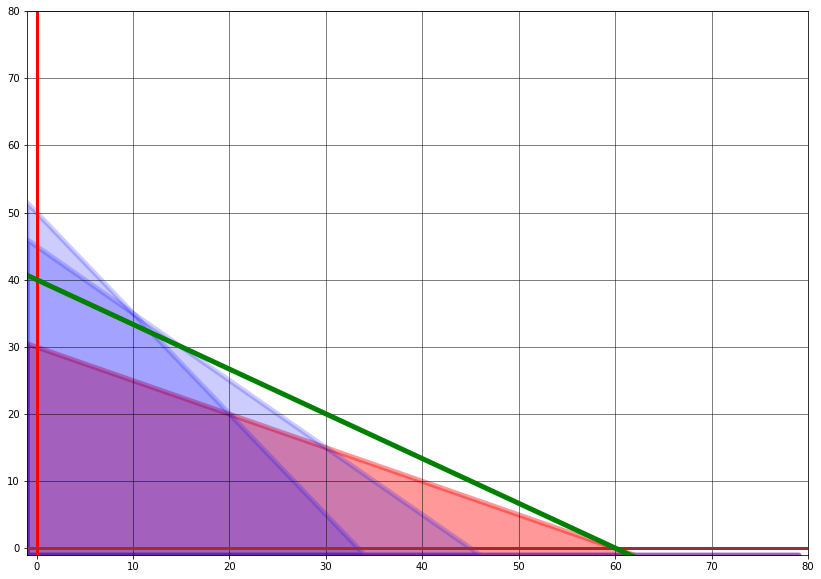

In [139]:
çizdir(15,30)

In [140]:
a=np.array([[2, 4],[3,2]])
b=np.array([[120],[100]])

np.linalg.solve(a,b)

array([[20.],
       [20.]])

10000


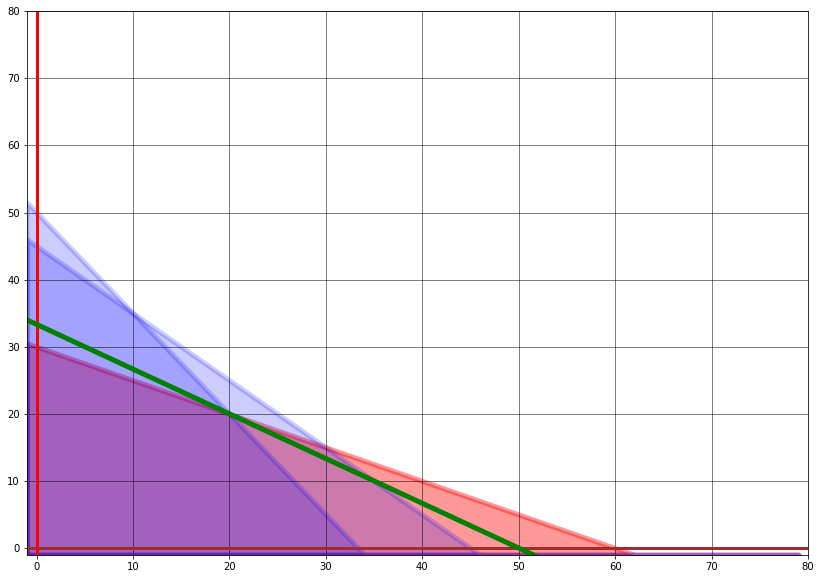

In [141]:
çizdir(20,20)

## Özel Durumlar

* Sonsuz sayıda çözümü olan sorular.
* Çözümü olmayan durumlar.
* Sınırlandırılmamış rastgele sonsuz büyüklükte amaç değeri olanlar

**Alternatif veya Çok Çözümlü Problemler** 

**Alternatif Çözümlü Problem**

**maksimize** 

* x1 * 300 + x2 * 200

**kısıtlar**


* painting     x1 / 40 + x2 /60<=1
    
*  assembling  x1 / 50+ x2 / 50<=1

*     x1>=0
*     x2>=0



In [4]:
def çizdir_maksimizasyon(a, b , x_bottom=-1, y_bottom=-1 , x_top=100,y_top=100,
                         rhs1=1,x1a1=40,x2a1=60,
                         rhs2=1,x1a2=50,x2a2=50,
                         amaça=300,amaçb=200,
                        a_kısıt=0,
                        b_kısıt=0):
    fig, ax = plt.subplots(figsize=(14, 10))
    try:
        asol=np.array([[x1a1, x2a1],[x1a2, x2a2]])
        bsol=np.array([[rhs1],[rhs2]])

        print("optimal:", np.linalg.solve(asol,bsol))
    except:
        print(" no solution") 
        
    x1=np.arange(x_bottom,x_top, 1)  #
    x2=(rhs1-x1*x1a1)/x2a1  #

    ax.fill_between(x1,x_bottom ,  x2,color='red', lw=5, alpha=0.4)  #

    x2=(rhs2-x1*x1a2)/x2a2  #

    ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=5, alpha=0.2)

    ax.axvline(a_kısıt, lw=3,color='red' )  #

    ax.axhline(b_kısıt, lw=3,color='brown' )  #
      

    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=amaça*a+amaçb* b
    print("amaç:",z)
    x=np.arange(x_bottom,x_top, 1)
    y=(z-amaça*x)/amaçb
    ax.plot(x,  y,color='green', lw=5)

amaç: 5000


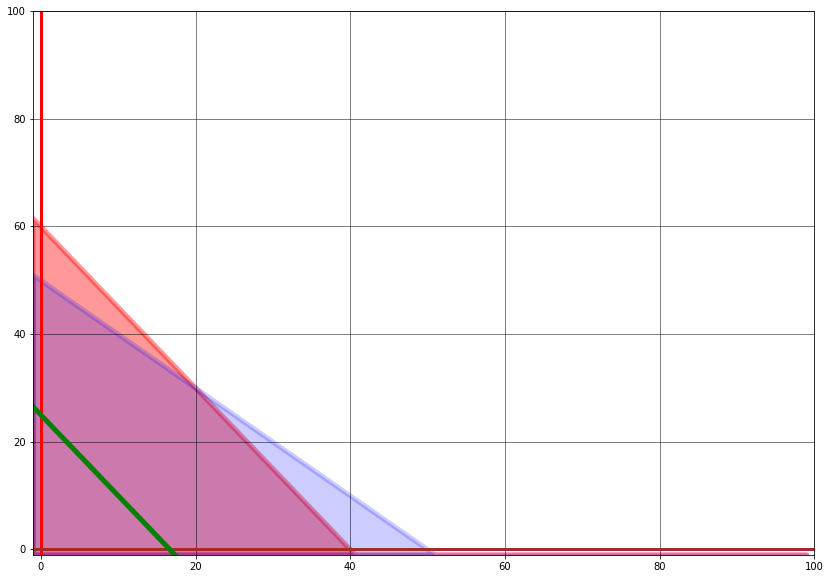

In [19]:
çizdir_maksimizasyon(a=10, b=10 , x_bottom=-1, y_bottom=-1 , x_top=100,y_top=100,rhs1=1,x1a1=1/40,x2a1=1/60,
                         rhs2=1,x1a2=1/50,x2a2=1/50,
                         amaça=300,amaçb=200)

In [149]:
a=np.array([[1/40, 1/60],[1/50, 1/50]])
b=np.array([[1],[1]])

np.linalg.solve(a,b)

array([[20.],
       [30.]])

amaç: 12000


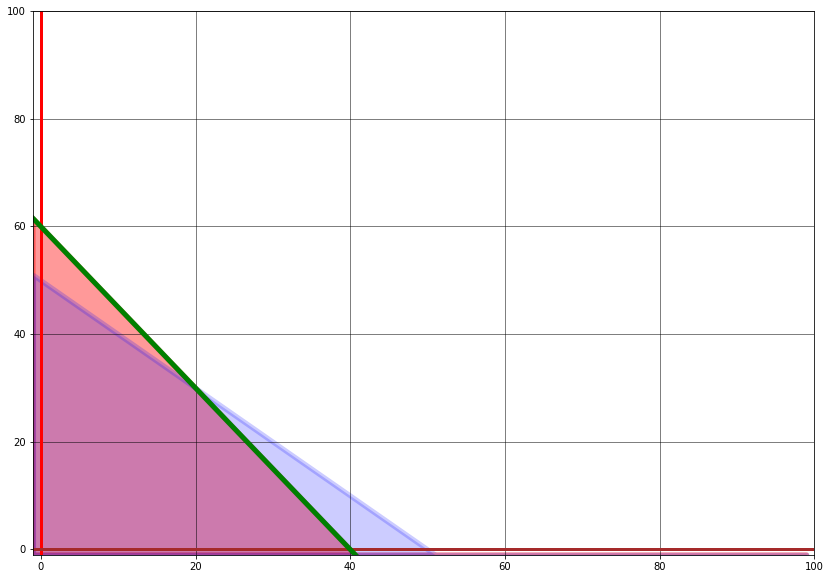

In [16]:
çizdir_maksimizasyon(a=20, b=30 , x_bottom=-1, y_bottom=-1 , x_top=100,y_top=100,rhs1=1,x1a1=1/40,x2a1=1/60,
                         rhs2=1,x1a2=1/50,x2a2=1/50,
                         amaça=300,amaçb=200)

**Amaç doğrusunun x1 e göre 20 ile 40 arasındaki bütün noktaları optimaldir.Bu yüzden sonsuz sayıda çözümü vardır.**

**Çözümü Olmayan Doğrusal Programlar**

* Çözüm noktaları uygun alan içinde değil ise buna çözümsüz sorunlar deriz.

amaç: 12000


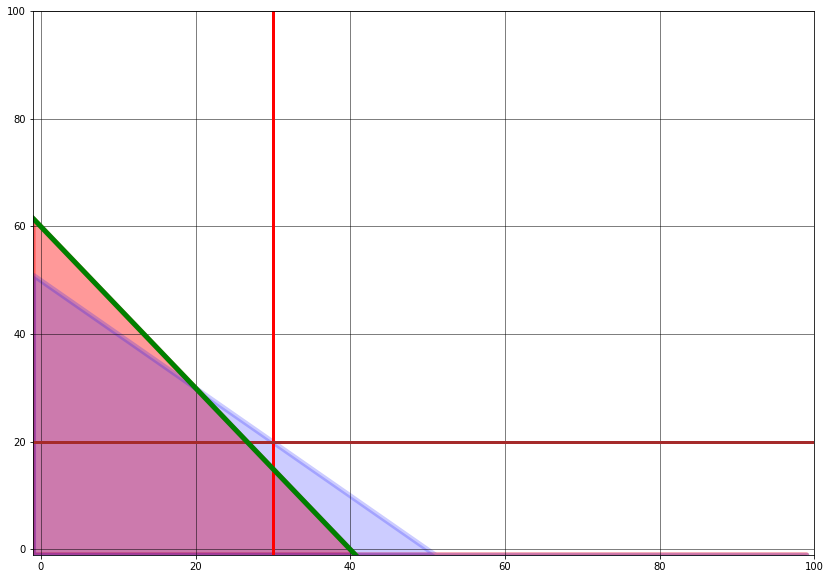

In [20]:
çizdir_maksimizasyon(a=20, b=30 , x_bottom=-1, y_bottom=-1 , x_top=100,y_top=100,rhs1=1,x1a1=1/40,x2a1=1/60,
                         rhs2=1,x1a2=1/50,x2a2=1/50,
                         amaça=300,amaçb=200,a_kısıt=30,b_kısıt=20)

* x1 in 30 dan büyük olduğu ve x2'nin 20 den büyük olduğu hiçbir alan amaç doğrusu ile kesişmez.

**Sınırlandırılmamış Doğrusal Programlar**

optimal: [[2.33333333]
 [1.33333333]]
amaç: 5


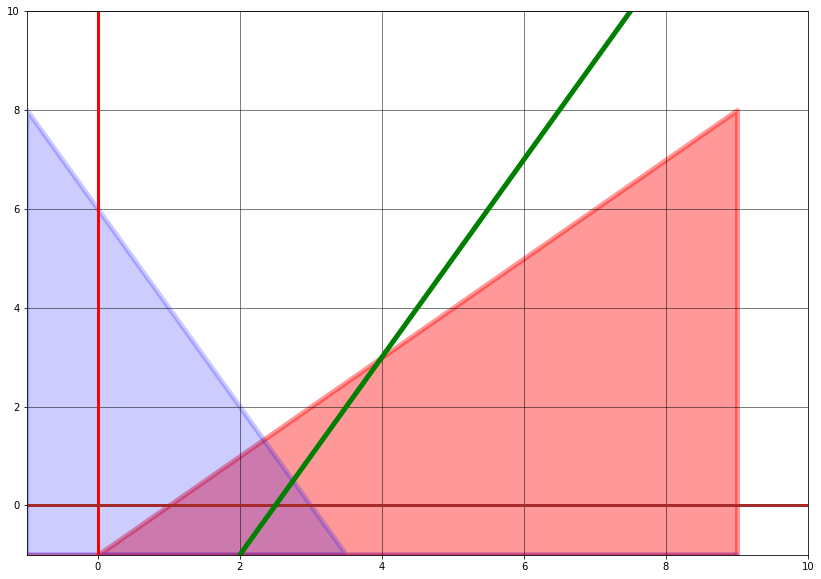

In [23]:
çizdir_maksimizasyon(a=5, b=5 , x_bottom=-1, y_bottom=-1 , x_top=10 ,y_top=10 ,rhs1=1,x1a1=1 ,x2a1=-1 ,
                         rhs2=6,x1a2=2,x2a2=1 ,
                         amaça=2,amaçb=-1,a_kısıt=0,b_kısıt=0)

In [62]:
def çizdir_minimizasyon(a, b , x_bottom=-1, y_bottom=-1 , x_top=100,y_top=100,
                         rhs1=1,x1a1=40,x2a1=60,
                         rhs2=1,x1a2=50,x2a2=50,
                         amaça=300,amaçb=200,
                        a_kısıt=0,
                        b_kısıt=0):
    fig, ax = plt.subplots(figsize=(14, 10))
    
    try:
        asol=np.array([[x1a1, x2a1],[x1a2, x2a2]])
        bsol=np.array([[rhs1],[rhs2]])

        print("optimal:", np.linalg.solve(asol,bsol))
    except:
        print(" no solution") 
    
    
    x1=np.arange(x_bottom,x_top, 1)  #
    x2=(rhs1-x1*x1a1)/x2a1  #

    ax.fill_between(x1, x2,x_top,color='red', lw=5, alpha=0.4)  #

    x2=(rhs2-x1*x1a2)/x2a2  #

    ax.fill_between(x1, x2,x_top,color='blue', lw=5, alpha=0.2)

    ax.axvline(a_kısıt, lw=3,color='red' )  #

    ax.axhline(b_kısıt, lw=3,color='brown' )  #
      

    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=amaça*a+amaçb* b
    print("amaç:",z)
    x=np.arange(x_bottom,x_top, 1)
    y=(z-amaça*x)/amaçb
    ax.plot(x,  y,color='green', lw=5)

optimal: [[2.33333333]
 [1.33333333]]
amaç: 3.3333333299999994


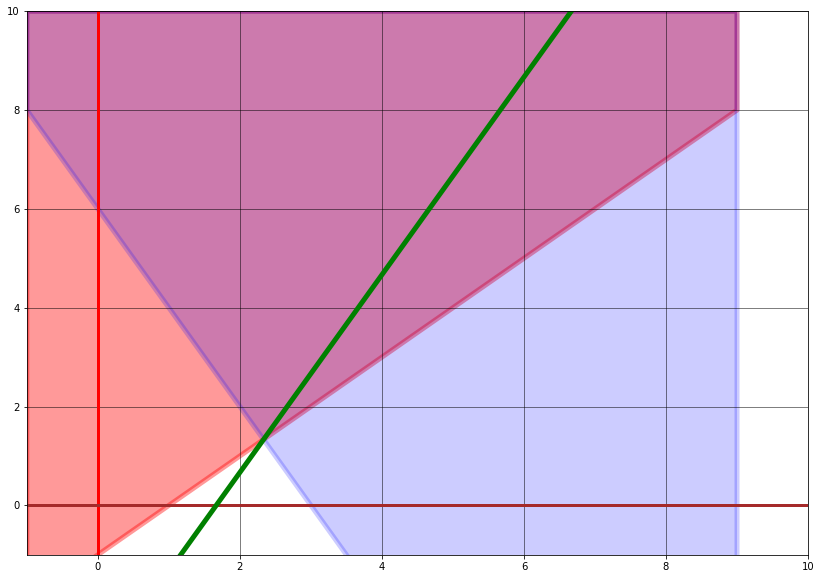

In [37]:
çizdir_minimizasyon(a=2.33333333, b=1.33333333 , x_bottom=-1, y_bottom=-1 , x_top=10 ,y_top=10 ,rhs1=1,x1a1=1 ,x2a1=-1 ,
                         rhs2=6,x1a2=2,x2a2=1 ,
                         amaça=2,amaçb=-1,a_kısıt=0,b_kısıt=0)

*  Maksimizasyon problemi olmasına rağmen kısıtlar tersi yönde olduğu için uygun alan sınırlandırılmamıştır.

### Sorular

#### Soru 1 

In [48]:
def çizdir_maksimizasyon_soru1(a=5, b=5 , x_bottom=-1, y_bottom=-1 , x_top=10 ,y_top=10 ,rhs1=4,x1a1=1 ,x2a1=1 ,
                         rhs2=5,x1a2=1,x2a2=-1 ,
                         amaça=1,amaçb=1,a_kısıt=0,b_kısıt=0):
    fig, ax = plt.subplots(figsize=(14, 10))
    try:
        asol=np.array([[x1a1, x2a1],[x1a2, x2a2]])
        bsol=np.array([[rhs1],[rhs2]])

        print("optimal:", np.linalg.solve(asol,bsol))
    except:
        print(" no solution") 
        
    x1=np.arange(x_bottom,x_top, 1)  #
    x2=(rhs1-x1*x1a1)/x2a1  #

    ax.fill_between(x1,x_bottom ,  x2,color='red', lw=5, alpha=0.4)  #

    x2=(rhs2-x1*x1a2)/x2a2  #

    ax.fill_between(x1, x2,x_top ,color='blue', lw=5, alpha=0.2)

    ax.axvline(a_kısıt, lw=3,color='red' )  #

    ax.axhline(b_kısıt, lw=3,color='brown' )  #
      

    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=amaça*a+amaçb* b
    print("amaç:",z)
    x=np.arange(x_bottom,x_top, 1)
    y=(z-amaça*x)/amaçb
    ax.plot(x,  y,color='green', lw=5)

optimal: [[ 4.5]
 [-0.5]]
amaç: 4.0


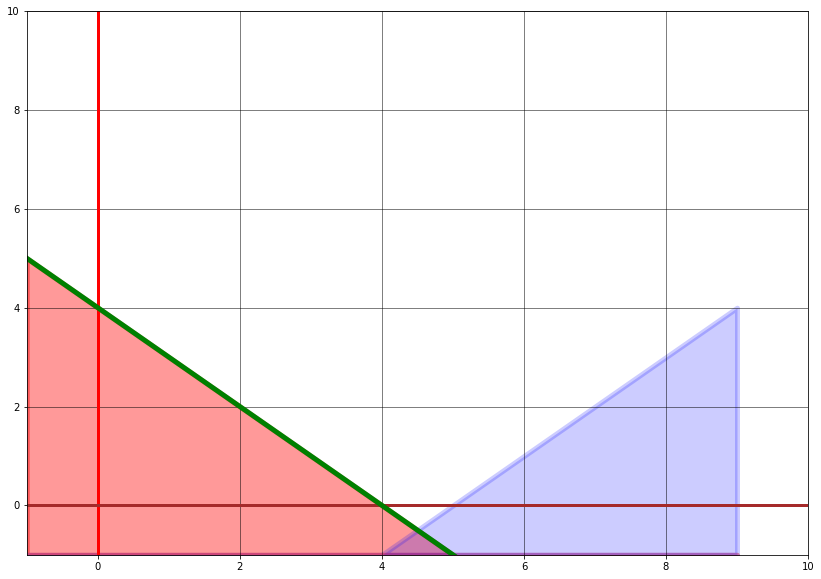

In [144]:
çizdir_maksimizasyon(a=4.5, b=-0.5, x_bottom=-1, y_bottom=-1 , x_top=10 ,y_top=10 ,rhs1=4,x1a1=1 ,x2a1=1 ,
                         rhs2=5,x1a2=1,x2a2=-1 ,
                         amaça=1,amaçb=1,a_kısıt=0,b_kısıt=0)

**Çözümsüzdür.**

**Sonsuz sayıda çözümlüdür.**

#### Soru 2

optimal: [[1.33333333]
 [2.66666667]]
amaç: 7.98


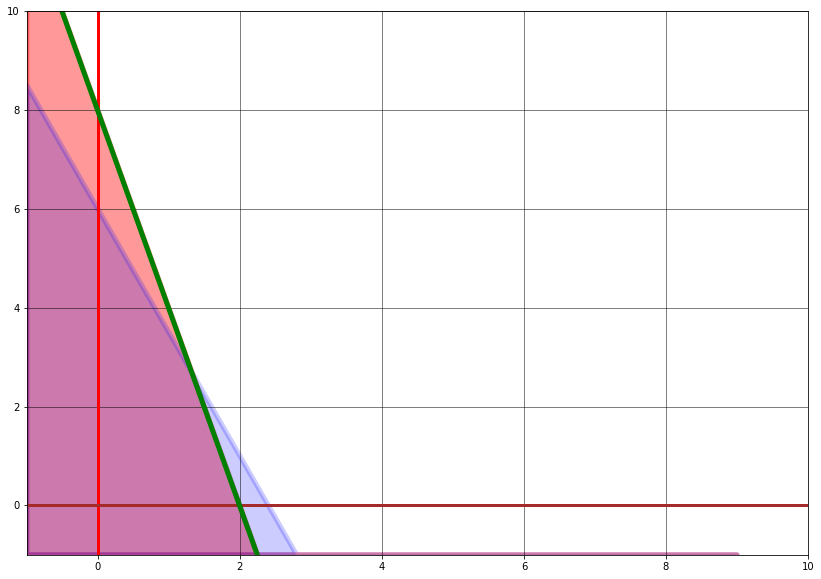

In [56]:
çizdir_maksimizasyon(a=1.33, b=2.66, x_bottom=-1, y_bottom=-1 , x_top=10 ,y_top=10 ,rhs1=16,x1a1=8 ,x2a1=2 ,
                         rhs2=12,x1a2=5,x2a2=2 ,
                         amaça=4,amaçb=1,a_kısıt=0,b_kısıt=0)

**Çok sayıda çözümü mevcuttur.**

#### Soru 3

optimal: [[4.]
 [0.]]
amaç: -4


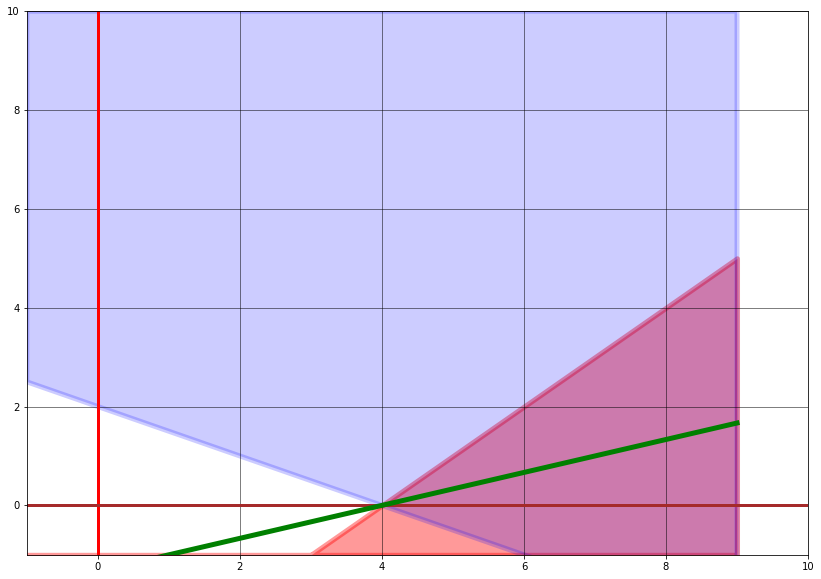

In [59]:
çizdir_maksimizasyon_soru1(a=4, b=0, x_bottom=-1, y_bottom=-1 , x_top=10 ,y_top=10 ,rhs1=4,x1a1=1 ,x2a1=-1 ,
                         rhs2=4,x1a2=1,x2a2=2 ,
                         amaça=-1,amaçb=3,a_kısıt=0,b_kısıt=0)

optimal: [[4.]
 [0.]]
amaç: 4


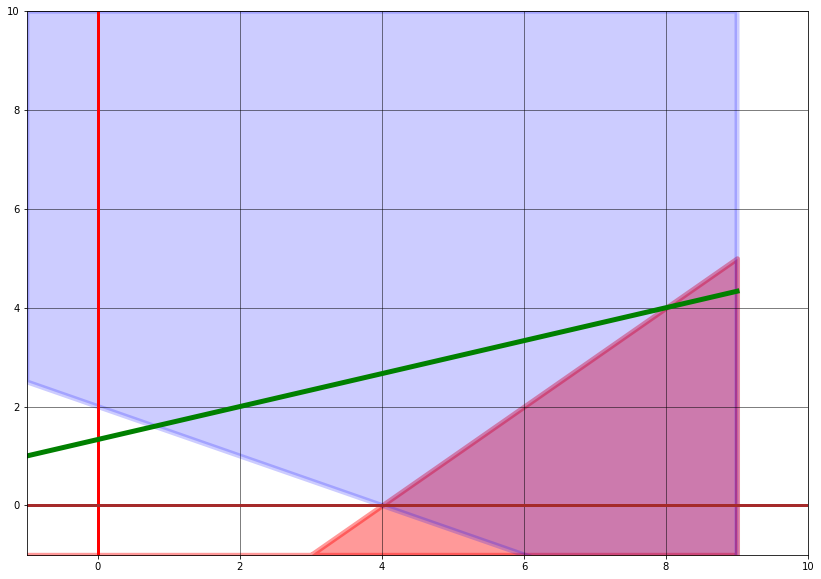

In [64]:
çizdir_maksimizasyon_soru1(a=8, b=4, x_bottom=-1, y_bottom=-1 , x_top=10 ,y_top=10 ,rhs1=4,x1a1=1 ,x2a1=-1 ,
                         rhs2=4,x1a2=1,x2a2=2 ,
                         amaça=-1,amaçb=3,a_kısıt=0,b_kısıt=0)

**Sınırlandırılmamış bir doğrusal programdır. İki kısıtın keşistiği alan üzerinde amaç değişkenini sonsuza kadar arttırabiliriz.**

#### Soru 4

optimal: [[1.8]
 [2.4]]
amaç: 7.800000000000001


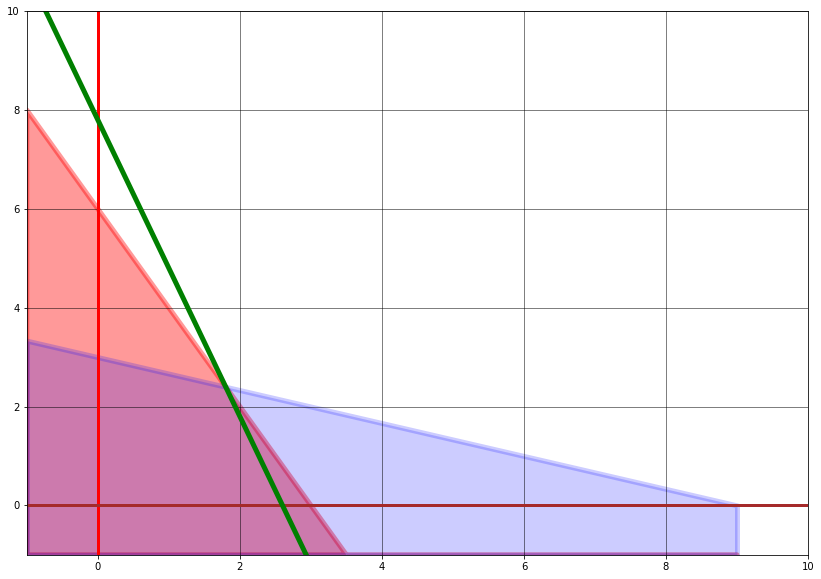

In [67]:
çizdir_maksimizasyon(a=1.8, b=2.4, x_bottom=-1, y_bottom=-1 , x_top=10 ,y_top=10 ,rhs1=6,x1a1=2 ,x2a1=1 ,
                         rhs2=9,x1a2=1,x2a2=3 ,
                         amaça=3,amaçb=1,a_kısıt=0,b_kısıt=0)

**Tek çözümlüdür**

#### Soru 5

In [68]:
True

True

#### Soru 6

In [69]:
True

True

#### Soru 7

* Maksimizasyon veya minimizasyon için durum aynı olduğundan dolayı sadece maksimizasyon üzerinden anlatırsak z yi en yüksek yapan değeri aradığımız için dış bükey bir düzlemde ekstrem noktalar en dışarıda kalan noktalar olacağı için maksimum değer aralarından seçilebilir. Fakat sınırlı olmayan bir programda bu noktalar zaten en büyük değerler olamaz.

#### Soru 8

In [78]:
def çizdir_minimizasyon_soru8(a, b , x_bottom=-1, y_bottom=-1 , x_top=10,y_top=10,
                        rhs0=1,x1a0=40,x2a0=60,
                         rhs1=1,x1a1=40,x2a1=60,
                         rhs2=1,x1a2=50,x2a2=50,
                         amaça=300,amaçb=200,
                        a_kısıt=0,
                        b_kısıt=0):
    fig, ax = plt.subplots(figsize=(14, 10))
    
    try:
        asol=np.array([[x1a0, x2a0],[x1a2, x2a2]])
        bsol=np.array([[rhs0],[rhs2]])

        print("optimal:", np.linalg.solve(asol,bsol))
    except:
        print(" no solution") 
    
    x1=np.arange(x_bottom,x_top, 1)  #
    x2=(rhs0-x1*x1a0)/x2a0  #

    ax.fill_between(x1,x_bottom, x2,color='yellow', lw=5, alpha=0.4)  #
    
    x1=np.arange(x_bottom,x_top, 1)  #
    x2=(rhs1-x1*x1a1)/x2a1  #

    ax.fill_between(x1, x2,x_top,color='red', lw=5, alpha=0.4)  #

    x2=(rhs2-x1*x1a2)/x2a2  #

    ax.fill_between(x1, x2,x_top,color='blue', lw=5, alpha=0.2)

    ax.axvline(a_kısıt, lw=3,color='red' )  #

    ax.axhline(b_kısıt, lw=3,color='brown' )  #
      

    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=amaça*a+amaçb* b
    print("amaç:",z)
    x=np.arange(x_bottom,x_top, 1)
    y=(z-amaça*x)/amaçb
    ax.plot(x,  y,color='green', lw=5)

optimal: [[1.5]
 [4.5]]
amaç: -3


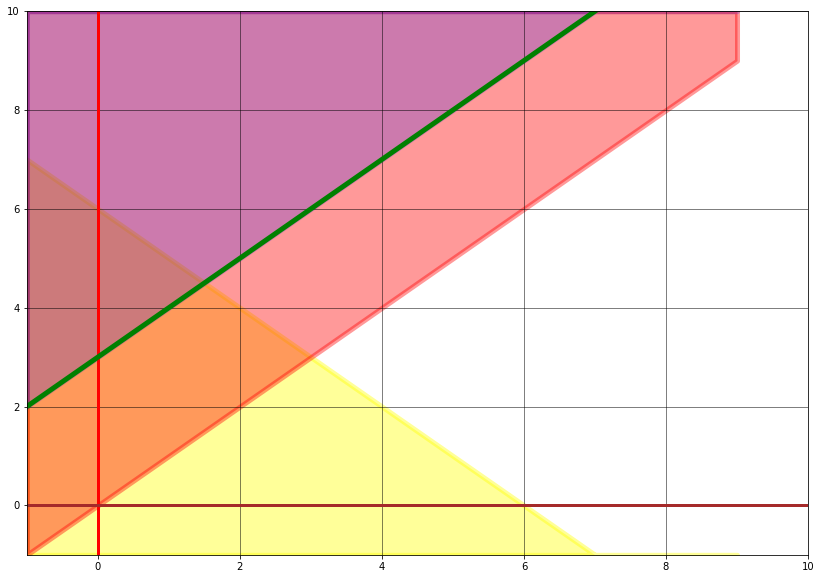

In [83]:
çizdir_minimizasyon_soru8(a=0, b=3 , x_bottom=-1, y_bottom=-1 , x_top=10,y_top=10,
                        rhs0=6,x1a0=1,x2a0=1,
                         rhs1=0,x1a1=1,x2a1=-1,
                         rhs2=3,x1a2=-1,x2a2=1,
                         amaça=1,amaçb=-1,
                        a_kısıt=0,
                        b_kısıt=0)

optimal: [[1.5]
 [4.5]]
amaç: -6


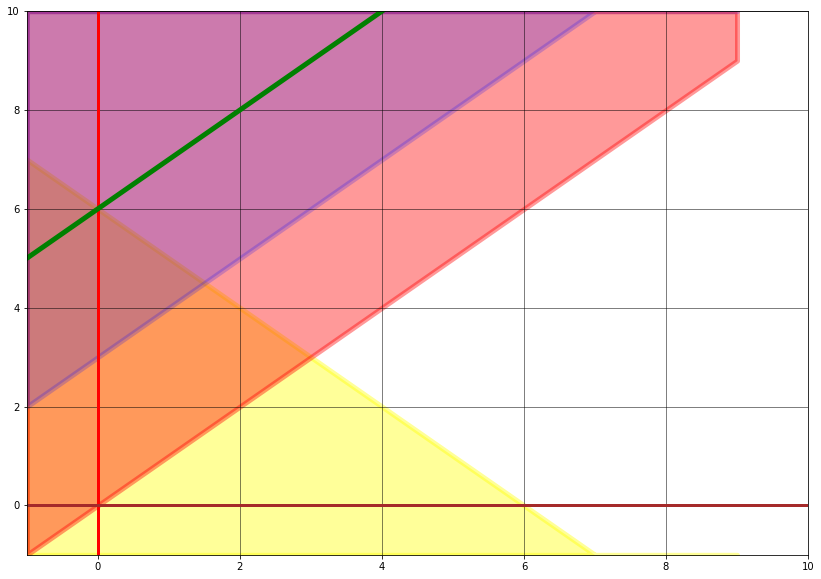

In [80]:
çizdir_minimizasyon_soru8(a=0, b=6 , x_bottom=-1, y_bottom=-1 , x_top=10,y_top=10,
                        rhs0=6,x1a0=1,x2a0=1,
                         rhs1=0,x1a1=1,x2a1=-1,
                         rhs2=3,x1a2=-1,x2a2=1,
                         amaça=1,amaçb=-1,
                        a_kısıt=0,
                        b_kısıt=0)

optimal: [[1.5]
 [4.5]]
amaç: -3.0


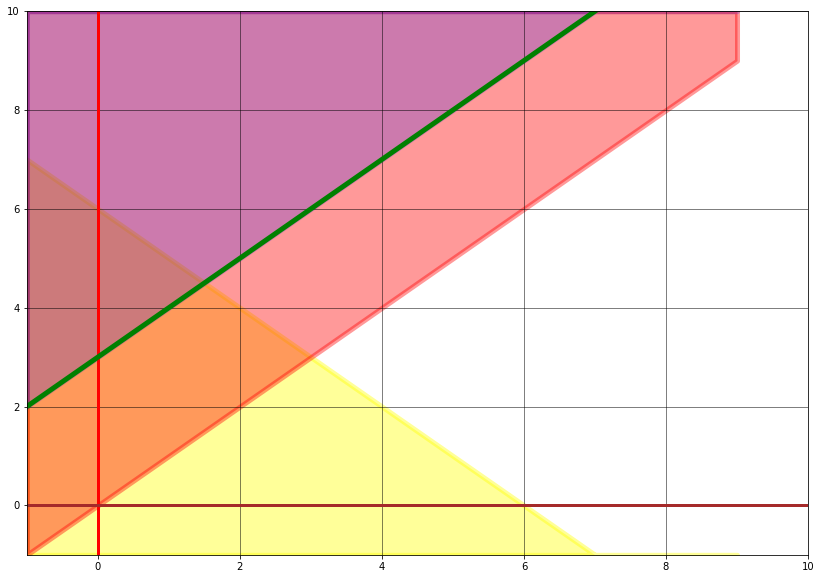

In [81]:
çizdir_minimizasyon_soru8(a=1.5, b=4.5 , x_bottom=-1, y_bottom=-1 , x_top=10,y_top=10,
                        rhs0=6,x1a0=1,x2a0=1,
                         rhs1=0,x1a1=1,x2a1=-1,
                         rhs2=3,x1a2=-1,x2a2=1,
                         amaça=1,amaçb=-1,
                        a_kısıt=0,
                        b_kısıt=0)

**Sadece x1:0 ve x2:6 için en küçük değeri alır.**

#### Soru 9

optimal: [[10.]
 [ 3.]]
amaç: 45


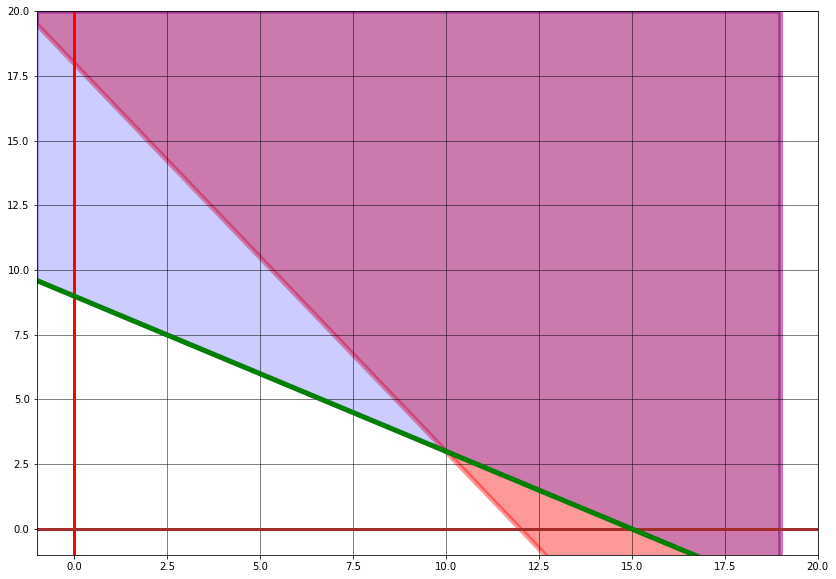

In [87]:
çizdir_minimizasyon(a=10, b=3 , x_bottom=-1, y_bottom=-1 , x_top=20,y_top=20,
                         rhs1=36,x1a1=3,x2a1=2,
                         rhs2=45,x1a2=3,x2a2=5,
                         amaça=3,amaçb=5,
                        a_kısıt=0,
                        b_kısıt=0)

optimal: [[10.]
 [ 3.]]
amaç: 45


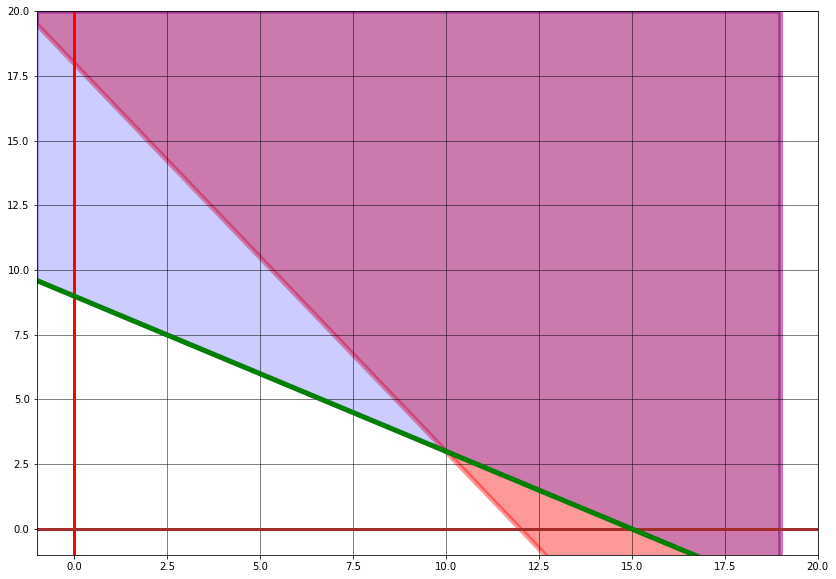

In [88]:
çizdir_minimizasyon(a=15, b=0 , x_bottom=-1, y_bottom=-1 , x_top=20,y_top=20,
                         rhs1=36,x1a1=3,x2a1=2,
                         rhs2=45,x1a2=3,x2a2=5,
                         amaça=3,amaçb=5,
                        a_kısıt=0,
                        b_kısıt=0)

#### Soru 10 



**maksimize** 
* x1-x2 / 4

**kısıtlar**

* 4 * x2 <= toplam dolar

* x1 / 3 <= toplam frank

* x1>=0

* x2>=0




amaç: 29.375


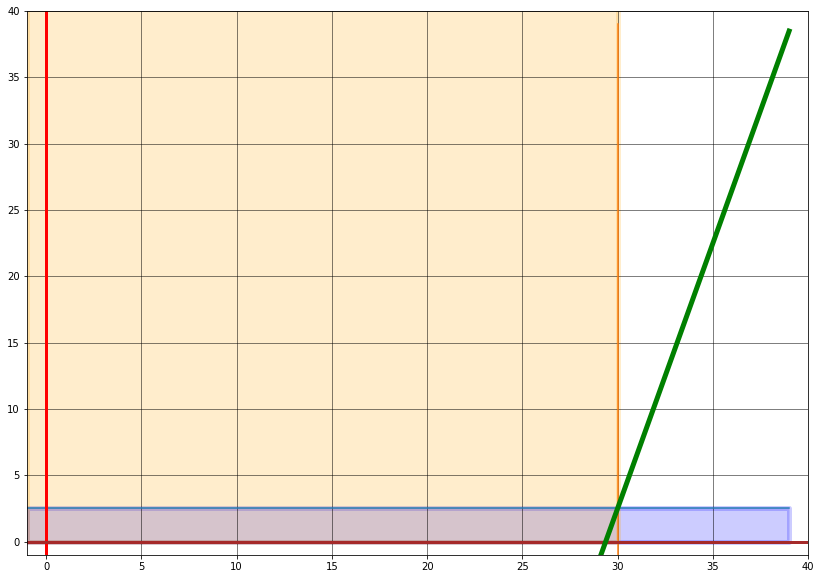

In [143]:
a=30
b=2.5
amaça=1
amaçb=-1/4
y_bottom=-1
x_bottom=-1
x_top=40
y_top=40
fig, ax = plt.subplots(figsize=(14, 10))

x1=np.arange(x_bottom,x_top, 1)  #
x2= len(x1)*[10/4]

ax.plot(x1,x2)
ax.fill_between(x1,0,10/4,color='blue', lw=5, alpha=0.2)

x2=np.arange(x_bottom,x_top, 1)  #
x1= len(x2)*[3*10]

ax.plot(x1,x2)

x1=np.arange(x_bottom,31, 1)
x2=len(x1)*[100]
ax.plot(x1,x2)

ax.fill_between(x1,0,x2,color='orange', lw=5, alpha=0.2)

ax.axvline(0, lw=3,color='red' )  #

ax.axhline(0, lw=3,color='brown' )  #


ax.set_ylim(y_bottom, y_top)
ax.set_xlim(x_bottom, x_top)
ax.grid(color='black', linestyle='-', linewidth=0.5)
z=amaça*a+amaçb* b
print("amaç:",z)
x=np.arange(x_bottom,x_top, 1)
y=(z-amaça*x)/amaçb
ax.plot(x,  y,color='green', lw=5);

## Diet Problemi

In [ ]:
Çikolatalı kek
Dondurma
Soda
Cheesecake
--------------
Brownie               50
Çikotalı Dondurma     20
Cola                  30
Ananaslı Cheesecake   80

500 kalori 
6 oz çikolata
10 oz şeker
8 oz yağ 

In [ ]:
x1 Brownie               50
x2 Çikotalı Dondurma     20
x3 Cola                  30
x4 Ananaslı Cheesecake   80

In [68]:
Besin=pd.DataFrame([['Brownie',400,3,2,2],['Çikolatalı Dondurma',200,2,2,4],['Cola',150,0,4,1],['Ananaslı Cheesecake',500,0,4,5]],columns=['Besin','Çikolata','Kalori','Şeker','Yağ'])

In [69]:
Besin=Besin.set_index('Besin')

In [70]:
Besin

,Çikolata,Kalori,Şeker,Yağ
Besin,,,,
Brownie,400,3,2,2
Çikolatalı Dondurma,200,2,2,4
Cola,150,0,4,1
Ananaslı Cheesecake,500,0,4,5


In [8]:
limitler=np.array([[500],[6],[10],[8]])

In [9]:
limitler

array([[500],
       [  6],
       [ 10],
       [  8]])

**min**

     x1 * 50 + x2 * 20 + x3 * 30 + x4 * 80 

**kısıtlar**

    x1 * 400 + x2 * 200 + x3 * 150 + x4 * 500 >= 500
    
    x1 * 3 + x2 * 2 + x3 * 0 + x4 * 0   >= 6
    
    x1 * 2 + x2 * 2 + x3 * 4 + x4 * 4  >= 10
     
    x1 * 2 + x2 * 4 + x3 * 1 + x4 * 5  >= 8 
    
**negatiflik**
     
     x1 , x2 , x3 ,  x4  >= 0

In [ ]:
x1              50
x2      20
x3                   30
x4    80

In [146]:
model = ConcreteModel()

In [147]:
model.Besin = Set(initialize=['Brownie','Çikolatalı Dondurma','Cola','Ananaslı Cheesecake'],ordered=True)

In [148]:
model.İhtiyaç = Set(initialize=['Çikolata', 'Kalori', 'Şeker', 'Yağ'],ordered=True)

In [149]:
model.Besin.pprint()

Besin : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=Insertion, Bounds=None
    ['Brownie', 'Çikolatalı Dondurma', 'Cola', 'Ananaslı Cheesecake']


In [150]:
Kısıt={}

for besin in model.Besin.iterkeys():
    for ihtiyaç in model.İhtiyaç.iterkeys():
        Kısıt[besin,ihtiyaç]=  Besin.loc[besin,ihtiyaç] 

In [151]:
model.Besinİhtiyac = Param(model.Besin , model.İhtiyaç, initialize=Kısıt)

In [152]:
Maliyet={}

maliyetler=[50,20,30,80]
i=0
for besin in model.Besin.iterkeys():
        Maliyet[besin]=  maliyetler[i]
        i+=1

In [153]:
model.BesinMaliyet=Param(model.Besin, initialize=Maliyet)

In [154]:
Kısıtİhtiyaç={}

kısıt=[500,6,10,8]
i=0
for ihtiyaç in model.İhtiyaç.iterkeys():
        Kısıtİhtiyaç[ihtiyaç]=  kısıt[i]
        i+=1

In [155]:
model.Kısıtİhtiyaç=Param(model.İhtiyaç, initialize=Kısıtİhtiyaç)

In [156]:
model.Kısıtİhtiyaç.pprint()

Kısıtİhtiyaç : Size=4, Index=İhtiyaç, Domain=Any, Default=None, Mutable=False
    Key      : Value
      Kalori :     6
         Yağ :     8
    Çikolata :   500
       Şeker :    10


In [157]:
model.BesinDeğişken =  Var(model.Besin, domain=NonNegativeReals,bounds=(0,None))

In [158]:
model.BesinDeğişken.pprint()

BesinDeğişken : Size=4, Index=Besin
    Key                 : Lower : Value : Upper : Fixed : Stale : Domain
    Ananaslı Cheesecake :     0 :  None :  None : False :  True : NonNegativeReals
                Brownie :     0 :  None :  None : False :  True : NonNegativeReals
                   Cola :     0 :  None :  None : False :  True : NonNegativeReals
    Çikolatalı Dondurma :     0 :  None :  None : False :  True : NonNegativeReals


In [159]:
def maliyet_kuralı(model):
    return sum(model.BesinMaliyet[i]*model.BesinDeğişken[i] for i in model.Besin)


In [160]:
model.cost = Objective(rule=maliyet_kuralı, sense=minimize)

In [163]:
model.Besinİhtiyac.pprint()

Besinİhtiyac : Size=16, Index=Besinİhtiyac_index, Domain=Any, Default=None, Mutable=False
    Key                                 : Value
      ('Ananaslı Cheesecake', 'Kalori') :     0
         ('Ananaslı Cheesecake', 'Yağ') :     5
    ('Ananaslı Cheesecake', 'Çikolata') :   500
       ('Ananaslı Cheesecake', 'Şeker') :     4
                  ('Brownie', 'Kalori') :     3
                     ('Brownie', 'Yağ') :     2
                ('Brownie', 'Çikolata') :   400
                   ('Brownie', 'Şeker') :     2
                     ('Cola', 'Kalori') :     0
                        ('Cola', 'Yağ') :     1
                   ('Cola', 'Çikolata') :   150
                      ('Cola', 'Şeker') :     4
      ('Çikolatalı Dondurma', 'Kalori') :     2
         ('Çikolatalı Dondurma', 'Yağ') :     4
    ('Çikolatalı Dondurma', 'Çikolata') :   200
       ('Çikolatalı Dondurma', 'Şeker') :     2


In [164]:
model.Çikolata = Constraint(expr = sum(model.Besinİhtiyac[i,'Çikolata']*model.BesinDeğişken[i] for i in model.Besin) >= model.Kısıtİhtiyaç['Çikolata'])
model.Kalori = Constraint(expr = sum(model.Besinİhtiyac[i,'Kalori']*model.BesinDeğişken[i] for i in model.Besin) >= model.Kısıtİhtiyaç['Kalori'])
model.Şeker = Constraint(expr = sum(model.Besinİhtiyac[i,'Şeker']*model.BesinDeğişken[i] for i in model.Besin) >= model.Kısıtİhtiyaç['Şeker'])
model.Yağ = Constraint(expr = sum(model.Besinİhtiyac[i,'Yağ']*model.BesinDeğişken[i] for i in model.Besin) >= model.Kısıtİhtiyaç['Yağ'])

In [177]:
SolverFactory('cbc',executable=path).solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 90.0
  Upper bound: 90.0
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 5
  Number of nonzeros: 4
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.03
  Wallclock time: 0.03
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created sub

In [181]:
model.BesinDeğişken.pprint()

BesinDeğişken : Size=4, Index=Besin
    Key                 : Lower : Value : Upper : Fixed : Stale : Domain
    Ananaslı Cheesecake :     0 :   0.0 :  None : False : False : NonNegativeReals
                Brownie :     0 :   0.0 :  None : False : False : NonNegativeReals
                   Cola :     0 :   1.0 :  None : False : False : NonNegativeReals
    Çikolatalı Dondurma :     0 :   3.0 :  None : False : False : NonNegativeReals


In [189]:
solver = SolverFactory('cbc',executable=path)

results = solver.solve(model, tee=True)

Welcome to the CBC MILP Solver 
Version: Trunk (unstable) 
Build Date: Feb 24 2019 

command line - C:\Users\onur.bilgic\Desktop\00_Onur_Bilgiç\08_Education\08_Optimization\OptimizationStudyGroup\optimization_study\coinor\Cbc-2.10.0-win32-msvc14\bin\cbc.exe -printingOptions all -import C:\Users\ONUR~1.BIL\AppData\Local\Temp\tmp4u74lgg5.pyomo.lp -stat=1 -solve -solu C:\Users\ONUR~1.BIL\AppData\Local\Temp\tmp4u74lgg5.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 4 (-1) rows, 4 (-1) columns and 14 (-1) elements
Statistics for presolved model


Problem has 4 rows, 4 columns (4 with objective) and 14 elements
Column breakdown:
4 of type 0.0->inf, 0 of type 0.0->up, 0 of type lo->inf, 
0 of type lo->up, 0 of type free, 0 of type fixed, 
0 of type -inf->0.0, 0 of type -inf->up, 0 of type 0.0->1.0 
Row breakdown:
0 of type E 0.0, 0 of type E 1.0, 0 of type E -1.0, 
0 of type E other, 0 of type G 0.0, 0 of type G 1.0, 
4 of type G other, 0 of typ

### Sorular

#### Soru 1

In [ ]:
fabrikalar

1,2,3

kirletici madde 1 ve 2   olarak  akarsuya bırakılıyor

1. fabrika 

    15 $ 1 ton atık temizleme 

    her bir ton temizlik

    1 . kirlilikten .1 
    2. kirlilikten .45 

2. fabrika 

    10 $ 1 ton atık temizleme 

    her bir ton temizlik

    1 . kirletici madde .2 
    2. kirletici madde .25
    
    
3. fabrika 

    20 $ 1 ton atık temizleme 

    her bir ton temizlik

    1 . kirletici madde .4 
    2. kirletici madde .3
    

Devlet 

      1 . kirletici madde 30
    2. kirletici madde  40
    
Temizlemek istiyor.

In [ ]:
x1=fabrika 1


**min**
*   15 * x1 + 10 * x2 +  20 * x3

**kısıtlar**
*    0.1 * x1 + 0.2 * x2 + 0.4 * x3 >=30

*    0.45 * x1 + 0.25 * x2 + 0.3 * x3 >=40

**negatiflik**
*   x1,x2,x3 >=0

Her bir karar değişkeninin etkisi değeri ile orantılıdır. **Oransallık**

Her bir karar değişkenin etkisi diğer karar değişkenlerinden bağımsızdır. **Eklenebilir** 

Tam sayı olması şart değil anlaşılan. **Bölünebilir**

Değişkenler dışındaki bütün parametrelerin bilindiği kabul edilmiştir. **Kesinlik**

In [45]:
model = ConcreteModel()
model.f1 = Var(domain=NonNegativeReals)
model.f2 = Var(domain=NonNegativeReals)
model.f3 = Var(domain=NonNegativeReals)
model.minimize = Objective(expr = 15 * model.f1 + 10 * model.f2 + 20* model.f3, sense=minimize)
model.atık1 = Constraint(expr = 0.1 * model.f1 + 0.2 * model.f2 + 0.4 *  model.f3 >= 30)
model.atık2 = Constraint(expr = 0.45 * model.f1 + 0.25 * model.f2 + 0.3 *  model.f3 >= 40)
model.pprint()

3 Var Declarations
    f1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    f2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    f3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    minimize : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 15*f1 + 10*f2 + 20*f3

2 Constraint Declarations
    atık1 : Size=1, Index=None, Active=True
        Key  : Lower : Body                     : Upper : Active
        None :  30.0 : 0.1*f1 + 0.2*f2 + 0.4*f3 :  +Inf :   True
    atık2 : Size=1, Index=None, Active=True
        Key  : Lower : Body                       : Upper : Active
       

In [47]:
SolverFactory('cbc',executable=path).solve(model).write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1576.923077
  Upper bound: 1576.923077
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 4
  Number of nonzeros: 3
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.03
  Wallclock time: 0.03
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number 

In [49]:

print('\nAmaç')
print('Maliyet = ', model.minimize())

print('\nDeğişkenler')
print('f1 = ', model.f1())
print('f2 = ', model.f2())
print('f3 = ', model.f3())

print('\nKısıtlar')
print('atık1  = ', model.atık1())
print('atık2 A = ', model.atık2())



Amaç
Maliyet =  1576.9231155000002

Değişkenler
f1 =  7.6923077
f2 =  146.15385
f3 =  0.0

Kısıtlar
atık1  =  30.000000770000003
atık2 A =  40.000000965


#### Soru  2

In [56]:

model = ConcreteModel()

model.s1 = Var(domain=NonNegativeReals)
model.s2 = Var(domain=NonNegativeReals)
model.s3 = Var(domain=NonNegativeReals)

model.maliyet = Objective(expr = 5 * model.s1 + 4 * model.s2 + 3* model.s3, sense=minimize)

model.büyük = Constraint(expr = 0.4 * model.s1 + 0.3 * model.s2 + 0.2 *  model.s3 >= 500)
model.orta = Constraint(expr = 0.4 * model.s1 + 0.35 * model.s2 + 0.2 *  model.s3 >= 300)
model.küçük = Constraint(expr = 0.2 * model.s1 + 0.20 * model.s2 + 0.6 *  model.s3 >= 300 )

model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()



print('\nAmaç')
print('Maliyet = ', model.maliyet())

print('\nDeğişkenler')
print('s1 = ', model.s1())
print('s2 = ', model.s2())
print('s3 = ', model.s3())

print('\nKısıtlar')
print('büyük  = ', model.büyük())
print('orta  = ', model.orta())
print('küçük  = ', model.küçük())


3 Var Declarations
    s1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    s2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    s3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    maliyet : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 5*s1 + 4*s2 + 3*s3

3 Constraint Declarations
    büyük : Size=1, Index=None, Active=True
        Key  : Lower : Body                     : Upper : Active
        None : 500.0 : 0.4*s1 + 0.3*s2 + 0.2*s3 :  +Inf :   True
    küçük : Size=1, Index=None, Active=True
        Key  : Lower : Body                     : Upper : Active
        None 

#### Soru  3

In [59]:

model = ConcreteModel()

model.g1 = Var(domain=NonNegativeReals)
model.g2 = Var(domain=NonNegativeReals)

model.maliyet = Objective(expr = 7 * model.g1 + 1 * model.g2 , sense=minimize)

model.vitaminA = Constraint(expr = 3 * model.g1 + 1 * model.g2   >= 12)
model.vitaminC = Constraint(expr = 1 * model.g1 + 1 * model.g2   >= 6)


model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()



print('\nAmaç')
print('Maliyet = ', model.maliyet())

print('\nDeğişkenler')
print('s1 = ', model.g1())
print('s2 = ', model.g2())


print('\nKısıtlar')
print('vitamin A  = ', model.vitaminA())
print('vitamin C  = ', model.vitaminC())


2 Var Declarations
    g1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    g2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    maliyet : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 7*g1 + g2

2 Constraint Declarations
    vitaminA : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  12.0 : 3*g1 + g2 :  +Inf :   True
    vitaminC : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   6.0 : g1 + g2 :  +Inf :   True

5 Declarations: g1 g2 maliyet vitaminA vitaminC
# ==========================================================
# = Solver Results                                         =
# ====

In [60]:

model = ConcreteModel()

model.g1 = Var(domain=NonNegativeReals)
model.g2 = Var(domain=NonNegativeReals)

model.maliyet = Objective(expr = 7 * model.g1 + 1 * model.g2 , sense=minimize)

model.vitaminA = Constraint(expr = 3 * model.g1 + 1 * model.g2  == 12)
model.vitaminC = Constraint(expr = 1 * model.g1 + 1 * model.g2   == 6)


model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()



print('\nAmaç')
print('Maliyet = ', model.maliyet())

print('\nDeğişkenler')
print('s1 = ', model.g1())
print('s2 = ', model.g2())


print('\nKısıtlar')
print('vitamin A  = ', model.vitaminA())
print('vitamin C  = ', model.vitaminC())


2 Var Declarations
    g1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    g2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    maliyet : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 7*g1 + g2

2 Constraint Declarations
    vitaminA : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  12.0 : 3*g1 + g2 :  12.0 :   True
    vitaminC : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   6.0 : g1 + g2 :   6.0 :   True

5 Declarations: g1 g2 maliyet vitaminA vitaminC
# ==========================================================
# = Solver Results                                         =
# ====

Not: A ile C arasındaki dengeyi tutturmak için 1 numaralı üründen fazla almak gerekti . Bu sebeple maliyet artmıştır.

#### Soru 4

optimal: [[0.]
 [6.]]
amaç: 6


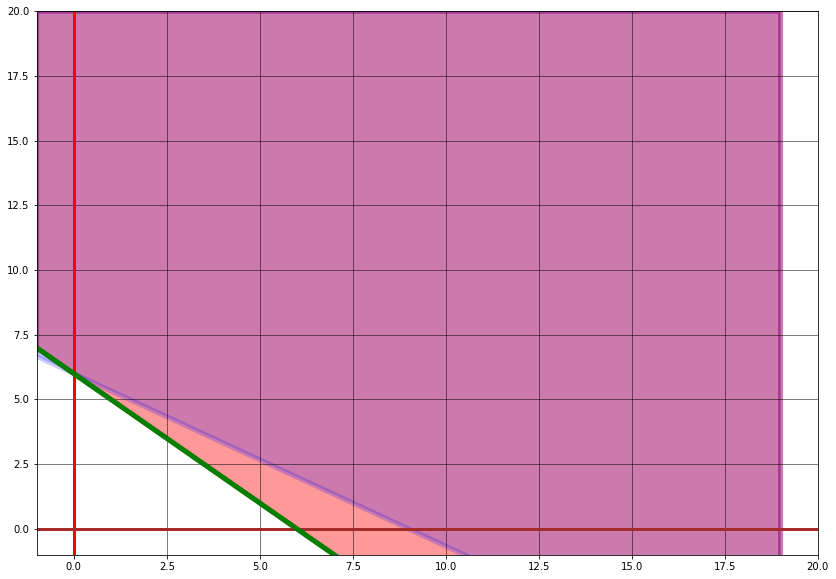

In [65]:
çizdir_minimizasyon(a=0, b=6 , x_bottom=-1, y_bottom=-1 , x_top=20,y_top=20,
                         rhs1=12,x1a1=2,x2a1=2,
                         rhs2=18,x1a2=2,x2a2=3,
                         amaça=1,amaçb=1,
                        a_kısıt=0,
                        b_kısıt=0)

## İş Çizelgeleme Problemi

In [67]:
İhtiyac=pd.DataFrame([['Pazartesi',17],['Salı',13],['Çarşamba',15],['Perşembe',19],['Cuma',14],['Cumartesi',16],['Pazar',11]],columns=['Gün','Çalışan İhtiyacı'])

In [68]:
İhtiyac    

,Gün,Çalışan İhtiyacı
0,Pazartesi,17
1,Salı,13
2,Çarşamba,15
3,Perşembe,19
4,Cuma,14
5,Cumartesi,16
6,Pazar,11


**Kısıt** her bir işçi en az 5 gün çalışmalı ve 2 gün izin yapmalıdır.

**Amaç** en az kaç işçi gereklidir.

In [93]:

model = ConcreteModel()

model.Pazartesi = Var(domain=PositiveIntegers)
model.Salı = Var(domain=PositiveIntegers)
model.Çarşamba = Var(domain=PositiveIntegers)
model.Perşembe = Var(domain=PositiveIntegers)
model.Cuma = Var(domain=PositiveIntegers)
model.Cumartesi = Var(domain=PositiveIntegers)
model.Pazar = Var(domain=PositiveIntegers)


model.Çalışan = Objective(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar , sense=minimize)

model.İhtiyacPazartesi = Constraint(expr = model.Pazartesi + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar  >= 17)
model.İhtiyacSalı = Constraint(expr =     model.Pazartesi + model.Salı  + model.Cuma + model.Cumartesi + model.Pazar >= 13)
model.İhtiyacÇarşamba = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Cumartesi + model.Pazar >= 15)
model.İhtiyacPerşembe = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe + model.Pazar >= 19)
model.İhtiyacCuma = Constraint(expr =     model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma >=14)
model.İhtiyacCumartesi = Constraint(expr = model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi   >= 16)
model.İhtiyacPazar = Constraint(expr = model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar  >= 11)

model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()



7 Var Declarations
    Cuma : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Cumartesi : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Pazar : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Pazartesi : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Perşembe : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Salı : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True :

In [94]:
print('\nAmaç')
print('Çalışan = ', model.Çalışan())

print('\nDeğişkenler')

print('Pazartesi  = ', model.Pazartesi())
print('Salı  = ', model.Salı())
print('Çarşamba  = ', model.Çarşamba())
print('Perşembe  = ',  model.Perşembe())
print('Cuma  = ',  model.Cuma())
print('Cumartesi  = ',   model.Cumartesi())
print('Pazar  = ',   model.Pazar())


# print('Pazartesi  = ', model.Pazartesi())
# print('Salı  = ', model.Salı())
# print('Çarşamba  = ', model.Çarşamba())
# print('Perşembe  = ',  model.Perşembe())
# print('Cuma  = ',  model.Cuma())
# print('Cumartesi  = ',   model.Cumartesi())
# print('Pazar  = ',   model.Pazar())


Amaç
Çalışan =  23.0

Değişkenler
Pazartesi  =  1.0
Salı  =  5.0
Çarşamba  =  1.0
Perşembe  =  7.0
Cuma  =  1.0
Cumartesi  =  2.0
Pazar  =  6.0


Her çalışan için adeletli bir sistem olması için çalışanlar 23 hafta boyunca kişi sayısı oranında  dönmesi gereklidir.

Örnek olarak bir çalışan 23 hafta da

* Hafta 1 Pazartesi  ile başlar
* Hafta 2-6 Salı  ile başlar
* Hafta 7 Çarşamba ile başlar
* Hafta 8-14 Perşembe ile başlar
* Hafta 15 Cuma ile başlar
* Hafta 16-17 Cumartesi ile başlar
* Hafta 17-23 Pazar ile başlar

**Modelleme Sorunları**


- Sorudaki günlük kişi sayısı sabit alınmıştır. Fakat gerçek hayatta bu değerler değişkendir. 
- Bu yöntemde değişken sayısı çok fazladır. 
- Buradaki sorun yarı zamanlı çalışanlar ile veya hafta sonu çalışmayı sınırlama ile genişletilebilinir.
- Kuyruk teorisi ile gelen mektup sayıları üzerinden olasılıksal modelleme yapılabilinir.

### Sorular

#### Soru 1

In [99]:
veri={'tam_zamanlı':{
       'değişkenler':{
            'pazartesi':17,
            'salı':13,
            'çarşamba':15,
            'perşembe':19,
            'cuma' :14,
            'cumartesi':16,
            'pazar':11},
        'maliyet':15,
    },
    'yarı_zamanlı':{
        'değişkenler':{
            'pazartesi':17,
            'salı':13,
            'çarşamba':15,
            'perşembe':19,
            'cuma' :14,
            'cumartesi':16,
            'pazar':11},
        'maliyet':10}}
        


In [108]:
veri

{'tam_zamanlı': {'değişkenler': {'pazartesi': 17,
   'salı': 13,
   'çarşamba': 15,
   'perşembe': 19,
   'cuma': 14,
   'cumartesi': 16,
   'pazar': 11},
  'maliyet': 15},
 'yarı_zamanlı': {'değişkenler': {'pazartesi': 17,
   'salı': 13,
   'çarşamba': 15,
   'perşembe': 19,
   'cuma': 14,
   'cumartesi': 16,
   'pazar': 11},
  'maliyet': 10}}

In [111]:
günlük_saat=8
yarı_zamanlı_oranı=0.25

In [150]:
T = veri.get('tam_zamanlı').get('değişkenler').keys()
Y = veri.get('yarı_zamanlı').get('değişkenler').keys()
K= veri.get('tam_zamanlı').get('değişkenler')
model = ConcreteModel()
model.t= Var(T, domain=PositiveIntegers)
model.y= Var(T, domain=PositiveIntegers)
model.maliyet=Objective(expr = sum(model.t[c]*15 + model.y[c]*10 for c in T))
model.sendika=Constraint(expr = sum(model.t[c] for c in T)-4*sum(model.y[c] for c in T)<=0)
model.İhtiyacPazartesi = Constraint(expr = 8 * (model.t['pazartesi'] + model.t['pazar'] +model.t['cumartesi'] +model.t['cuma'] +model.t['perşembe']) +\
             4 * ( model.y['pazartesi'] + model.y['pazar'] + model.y['cumartesi'] + model.y['cuma'] + model.y['perşembe'] )  >= K['pazartesi']*günlük_saat)
model.İhtiyacSalı = Constraint(expr = 8*(model.t['salı'] + model.t['pazartesi'] +model.t['pazar'] +model.t['cumartesi'] +model.t['cuma']) + \
            4 * (model.y['salı'] + model.y['pazartesi'] +model.y['pazar'] +model.y['cumartesi'] +model.y['cuma'])  >= K['salı']*günlük_saat)
model.İhtiyacÇarşamba = Constraint(expr = 8*(model.t['çarşamba'] + model.t['salı'] +model.t['pazartesi'] +model.t['pazar'] +model.t['cumartesi']) + \
            4 * (model.y['çarşamba'] + model.y['salı'] +model.y['pazartesi'] +model.y['pazar'] +model.y['cumartesi'])  >= K['çarşamba']*günlük_saat)
model.İhtiyacPerşembe = Constraint(expr = 8*(model.t['perşembe'] + model.t['çarşamba'] +model.t['salı'] +model.t['pazartesi'] +model.t['pazar']) + \
            4 * (model.y['perşembe'] + model.y['çarşamba'] +model.y['salı'] +model.y['pazartesi'] +model.y['pazar'])  >= K['perşembe']*günlük_saat)
model.İhtiyacCuma = Constraint(expr = 8*(model.t['cuma']+model.t['perşembe'] + model.t['çarşamba'] +model.t['salı'] +model.t['pazartesi'] ) + \
            4 * (model.y['cuma']+model.y['perşembe'] + model.y['çarşamba'] +model.y['salı'] +model.y['pazartesi'] )  >= K['cuma']*günlük_saat)
model.İhtiyacCumartesi = Constraint(expr = 8*(model.t['cumartesi']+model.t['cuma']+model.t['perşembe'] + model.t['çarşamba'] +model.t['salı']  ) + \
            4 * (model.y['cumartesi'] +model.y['cuma']+model.y['perşembe'] + model.y['çarşamba'] +model.y['salı'] )  >= K['cumartesi']*günlük_saat)
model.İhtiyacPazar = Constraint(expr = 8*( model.t['pazar'] + model.t['cumartesi']+model.t['cuma']+model.t['perşembe'] + model.t['çarşamba']) + \
            4 * ( model.t['pazar'] + model.y['cumartesi'] +model.y['cuma']+model.y['perşembe'] + model.y['çarşamba'] )  >= K['pazar']*günlük_saat)
 
model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()

print('\nAmaç')
print('Maliyet = ', model.maliyet())

print('\nDeğişkenler')

print('Tam zamanlı',model.t.get_values())
print('Yarı zamanlı',model.y.get_values())

2 Set Declarations
    t_index : Dim=0, Dimen=1, Size=7, Domain=None, Ordered=False, Bounds=None
        ['cuma', 'cumartesi', 'pazar', 'pazartesi', 'perşembe', 'salı', 'çarşamba']
    y_index : Dim=0, Dimen=1, Size=7, Domain=None, Ordered=False, Bounds=None
        ['cuma', 'cumartesi', 'pazar', 'pazartesi', 'perşembe', 'salı', 'çarşamba']

2 Var Declarations
    t : Size=7, Index=t_index
        Key       : Lower : Value : Upper : Fixed : Stale : Domain
             cuma :     1 :  None :  None : False :  True : PositiveIntegers
        cumartesi :     1 :  None :  None : False :  True : PositiveIntegers
            pazar :     1 :  None :  None : False :  True : PositiveIntegers
        pazartesi :     1 :  None :  None : False :  True : PositiveIntegers
         perşembe :     1 :  None :  None : False :  True : PositiveIntegers
             salı :     1 :  None :  None : False :  True : PositiveIntegers
         çarşamba :     1 :  None :  None : False :  True : PositiveIntegers
 

#### Soru 2


In [ ]:
12 - 4 : 8
4-8    : 7
8-12   : 6
12-16  : 6
16-20  : 5
20-00  : 4

In [152]:

model = ConcreteModel()

model.v1 = Var(domain=PositiveIntegers)
model.v2 = Var(domain=PositiveIntegers)
model.v3 = Var(domain=PositiveIntegers)
model.v4 = Var(domain=PositiveIntegers)
model.v5 = Var(domain=PositiveIntegers)
model.v6 = Var(domain=PositiveIntegers)


model.Çalışan = Objective(expr = model.v1 + model.v2 + model.v3 + model.v4  + model.v5 + model.v6 , sense=minimize)

model.İhtiyacv1 = Constraint(expr =  model.v1 +  model.v6   >= 8)
model.İhtiyacv2 = Constraint(expr =  model.v1 + model.v2   >= 7 )
model.İhtiyacv3 = Constraint(expr =  model.v2 + model.v3   >= 6 )
model.İhtiyacv4 = Constraint(expr =  model.v3 + model.v4   >= 6 )
model.İhtiyacv5 = Constraint(expr =  model.v4  + model.v5    >= 5 )
model.İhtiyacv6 = Constraint(expr =   model.v5 + model.v6   >= 4 )

model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()



6 Var Declarations
    v1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    v2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    v3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    v4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    v5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    v6 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers

1 Object

In [153]:
print('\nAmaç')
print('Çalışan = ', model.Çalışan())

print('\nDeğişkenler')

print('v1  = ', model.v1())
print('v2  = ', model.v2())
print('v3  = ', model.v3())
print('v4  = ',  model.v4())
print('v5  = ',  model.v5())
print('v6  = ',   model.v6())



Amaç
Çalışan =  19.0

Değişkenler
v1  =  3.0
v2  =  4.0
v3  =  2.0
v4  =  4.0
v5  =  1.0
v6  =  5.0


####  Soru 3

In [158]:
model = ConcreteModel()

model.Pazartesi = Var(domain=PositiveIntegers)
model.Pazartesi1 = Var(domain=PositiveIntegers)
model.Pazartesi2 = Var(domain=PositiveIntegers)

model.Salı = Var(domain=PositiveIntegers)
model.Salı1  = Var(domain=PositiveIntegers)
model.Salı2 = Var(domain=PositiveIntegers)

model.Çarşamba = Var(domain=PositiveIntegers)
model.Çarşamba1 = Var(domain=PositiveIntegers)
model.Çarşamba2= Var(domain=PositiveIntegers)

model.Perşembe = Var(domain=PositiveIntegers)
model.Perşembe1 = Var(domain=PositiveIntegers)
model.Perşembe2 = Var(domain=PositiveIntegers)

model.Cuma = Var(domain=PositiveIntegers)
model.Cuma1 = Var(domain=PositiveIntegers)
model.Cuma2 = Var(domain=PositiveIntegers)


model.Cumartesi = Var(domain=PositiveIntegers)
model.Cumartesi1 = Var(domain=PositiveIntegers)
model.Cumartesi2 = Var(domain=PositiveIntegers)

model.Pazar = Var(domain=PositiveIntegers)
model.Pazar1 = Var(domain=PositiveIntegers)
model.Pazar2 = Var(domain=PositiveIntegers)


model.Çalışan = Objective(expr = (model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar)*250 +\
                                   (model.Pazartesi1 + model.Salı1 + model.Çarşamba1 + model.Perşembe1  + model.Cuma1 + model.Cumartesi1 + model.Pazar1)*62 +
                           (model.Pazartesi2 + model.Salı2 + model.Çarşamba2 + model.Perşembe2  + model.Cuma2 + model.Cumartesi2 + model.Pazar2)*62 
                              , sense=minimize)

model.İhtiyacPazartesi = Constraint(expr = model.Pazartesi + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar + model.Salı2  + model.Çarşamba1 >= 17)
model.İhtiyacSalı = Constraint(expr =     model.Pazartesi + model.Salı  + model.Cuma + model.Cumartesi + model.Pazar+ model.Çarşamba1 + model.Perşembe1  >= 13)
model.İhtiyacÇarşamba = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Cumartesi + model.Pazar+ model.Perşembe2+ model.Cuma1  >= 15)
model.İhtiyacPerşembe = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe + model.Pazar + model.Cuma2+ model.Cumartesi1 >= 19)
model.İhtiyacCuma = Constraint(expr =     model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi2+ model.Pazar1>=14)
model.İhtiyacCumartesi = Constraint(expr = model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi  + model.Pazar2+model.Pazartesi1   >= 16)
model.İhtiyacPazar = Constraint(expr = model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar + model.Pazartesi2 +model.Salı1 >= 11)

model.İhtiyacPazartesi1 = Constraint(expr = model.Pazartesi - model.Pazartesi1 >= 0)
model.İhtiyacSalı1 = Constraint(expr =      model.Salı-model.Salı1  >= 0)
model.İhtiyacÇarşamba1 = Constraint(expr = model.Çarşamba - model.Çarşamba1  >= 0)
model.İhtiyacPerşembe1 = Constraint(expr =  model.Perşembe - model.Perşembe1 >= 0)
model.İhtiyacCuma1 = Constraint(expr =     model.Cuma-model.Cuma1>=0)
model.İhtiyacCumartesi1 = Constraint(expr =  model.Cumartesi - model.Cumartesi1 >=0)
model.İhtiyacPazar1 = Constraint(expr = model.Pazar-model.Pazar1  >= 0)


model.İhtiyacPazartesi2 = Constraint(expr = model.Pazartesi - model.Pazartesi2 >= 0)
model.İhtiyacSalı2 = Constraint(expr =      model.Salı-model.Salı2  >= 0)
model.İhtiyacÇarşamba2 = Constraint(expr = model.Çarşamba - model.Çarşamba2  >= 0)
model.İhtiyacPerşembe2 = Constraint(expr =  model.Perşembe - model.Perşembe2 >= 0)
model.İhtiyacCuma2 = Constraint(expr =     model.Cuma-model.Cuma2>=0)
model.İhtiyacCumartesi2 = Constraint(expr =  model.Cumartesi - model.Cumartesi2 >=0)
model.İhtiyacPazar2 = Constraint(expr = model.Pazar-model.Pazar2  >= 0)


model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()



21 Var Declarations
    Cuma : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Cuma1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Cuma2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Cumartesi : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Cumartesi1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Cumartesi2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  T

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 5804.0
  Upper bound: 5804.0
  Number of objectives: 1
  Number of constraints: 21
  Number of variables: 21
  Number of binary variables: 0
  Number of integer variables: 21
  Number of nonzeros: 21
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.04
  Wallclock time: 0.04
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and boun

In [159]:
print('\nAmaç')
print('Çalışan = ', model.Çalışan())

print('\nDeğişkenler')

print('Pazartesi  = ', model.Pazartesi())
print('Salı  = ', model.Salı())
print('Çarşamba  = ', model.Çarşamba())
print('Perşembe  = ',  model.Perşembe())
print('Cuma  = ',  model.Cuma())
print('Cumartesi  = ',   model.Cumartesi())
print('Pazar  = ',   model.Pazar())


Amaç
Çalışan =  5804.0

Değişkenler
Pazartesi  =  4.0
Salı  =  1.0
Çarşamba  =  3.0
Perşembe  =  5.0
Cuma  =  1.0
Cumartesi  =  1.0
Pazar  =  4.0


In [160]:

print('Pazartesi  = ', model.Pazartesi1())
print('Salı  = ', model.Salı1())
print('Çarşamba  = ', model.Çarşamba1())
print('Perşembe  = ',  model.Perşembe1())
print('Cuma  = ',  model.Cuma1())
print('Cumartesi  = ',   model.Cumartesi1())
print('Pazar  = ',   model.Pazar1())

Pazartesi  =  1.0
Salı  =  1.0
Çarşamba  =  1.0
Perşembe  =  1.0
Cuma  =  1.0
Cumartesi  =  1.0
Pazar  =  1.0


In [161]:

print('Pazartesi  = ', model.Pazartesi2())
print('Salı  = ', model.Salı2())
print('Çarşamba  = ', model.Çarşamba2())
print('Perşembe  = ',  model.Perşembe2())
print('Cuma  = ',  model.Cuma2())
print('Cumartesi  = ',   model.Cumartesi2())
print('Pazar  = ',   model.Pazar2())

Pazartesi  =  1.0
Salı  =  1.0
Çarşamba  =  1.0
Perşembe  =  1.0
Cuma  =  1.0
Cumartesi  =  1.0
Pazar  =  4.0


#### Soru 4

In [163]:
model = ConcreteModel()

model.Pazartesi = Var(domain=PositiveIntegers)
model.Salı = Var(domain=PositiveIntegers)
model.Çarşamba = Var(domain=PositiveIntegers)
model.Perşembe = Var(domain=PositiveIntegers)
model.Cuma = Var(domain=PositiveIntegers)
model.Cumartesi = Var(domain=PositiveIntegers)
model.Pazar = Var(domain=PositiveIntegers)


model.Çalışan = Objective(expr = model.Pazartesi + model.Salı + model.Pazar , sense=maximize)
model.ToplamÇalışan = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar  == 25)
model.İhtiyacPazartesi = Constraint(expr = model.Pazartesi + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar  >= 17)
model.İhtiyacSalı = Constraint(expr =     model.Pazartesi + model.Salı  + model.Cuma + model.Cumartesi + model.Pazar >= 13)
model.İhtiyacÇarşamba = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Cumartesi + model.Pazar >= 15)
model.İhtiyacPerşembe = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe + model.Pazar >= 19)
model.İhtiyacCuma = Constraint(expr =     model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma >=14)
model.İhtiyacCumartesi = Constraint(expr = model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi   >= 16)
model.İhtiyacPazar = Constraint(expr = model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar  >= 11)

model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()


7 Var Declarations
    Cuma : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Cumartesi : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Pazar : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Pazartesi : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Perşembe : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Salı : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True :

In [166]:
print('Tatil Günü Maks')
print('Çalışan = ', model.Çalışan())

print('\nDeğişkenler')

print('Pazartesi  = ', model.Pazartesi())
print('Salı  = ', model.Salı())
print('Çarşamba  = ', model.Çarşamba())
print('Perşembe  = ',  model.Perşembe())
print('Cuma  = ',  model.Cuma())
print('Cumartesi  = ',   model.Cumartesi())
print('Pazar  = ',   model.Pazar())


Tatil Günü Maks
Çalışan =  16.0

Değişkenler
Pazartesi  =  1.0
Salı  =  7.0
Çarşamba  =  1.0
Perşembe  =  6.0
Cuma  =  1.0
Cumartesi  =  1.0
Pazar  =  8.0


#### Soru 5

In [229]:
data={1:15,2:5,3:12,4:6}

model = ConcreteModel()

model.değişken=Var(data.keys(),data.keys(),domain=PositiveIntegers)

ardıl=0
dağınık=0

for i in range(1,5):
     for j in range(1,5):
            if i==j:
                ardıl+=model.değişken[i,j]
            elif i==j+1:
                ardıl+=model.değişken[i,j]
            elif i==4 and j==1:
                ardıl+=model.değişken[i,j]
            else:
                dağınık+=model.değişken[i,j]

model.maliyet= Objective(expr =  ardıl*12 +dağınık*18  , sense=minimize)
model.kısıt = ConstraintList()

for s in data.keys():
    model.kısıt.add(sum(model.değişken[v,s] for v in data.keys()) >= data[s])
    
model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()

4 Set Declarations
    değişken_index : Dim=0, Dimen=2, Size=16, Domain=None, Ordered=False, Bounds=None
        Virtual
    değişken_index_0 : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=False, Bounds=(1, 4)
        [1, 2, 3, 4]
    değişken_index_1 : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=False, Bounds=(1, 4)
        [1, 2, 3, 4]
    kısıt_index : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=False, Bounds=None
        [1, 2, 3, 4]

1 Var Declarations
    değişken : Size=16, Index=değişken_index
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     1 :  None :  None : False :  True : PositiveIntegers
        (1, 2) :     1 :  None :  None : False :  True : PositiveIntegers
        (1, 3) :     1 :  None :  None : False :  True : PositiveIntegers
        (1, 4) :     1 :  None :  None : False :  True : PositiveIntegers
        (2, 1) :     1 :  None :  None : False :  True : PositiveIntegers
        (2, 2) :     1 :  None :  None : False :  True : 

In [235]:
model.maliyet()

504.0

In [232]:
model.kısıt.pprint()

kısıt : Size=4, Index=kısıt_index, Active=True
    Key : Lower : Body                                                          : Upper : Active
      1 :  15.0 : değişken[1,1] + değişken[2,1] + değişken[3,1] + değişken[4,1] :  +Inf :   True
      2 :   5.0 : değişken[1,2] + değişken[2,2] + değişken[3,2] + değişken[4,2] :  +Inf :   True
      3 :  12.0 : değişken[1,3] + değişken[2,3] + değişken[3,3] + değişken[4,3] :  +Inf :   True
      4 :   6.0 : değişken[1,4] + değişken[2,4] + değişken[3,4] + değişken[4,4] :  +Inf :   True


In [234]:
model.değişken.pprint()            

değişken : Size=16, Index=değişken_index
    Key    : Lower : Value : Upper : Fixed : Stale : Domain
    (1, 1) :     1 :  12.0 :  None : False : False : PositiveIntegers
    (1, 2) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (1, 3) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (1, 4) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (2, 1) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (2, 2) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (2, 3) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (2, 4) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (3, 1) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (3, 2) :     1 :   2.0 :  None : False : False : PositiveIntegers
    (3, 3) :     1 :   9.0 :  None : False : False : PositiveIntegers
    (3, 4) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (4, 1) :     1 :   1.0 :  None : False : False : Positi

#### Soru 6

In [3]:
model = ConcreteModel()

In [4]:
indeks=[]
for i in range(1,5):
    for j in range(1,5):
        if not (i==j-3 or i==j+1) : 
            t=(i,j)
            indeks.append(t)

In [5]:
model.A = Set(initialize=indeks)

In [6]:
model.değişken = Var(model.A, domain=PositiveIntegers)

In [7]:
model.değişken.pprint()

değişken : Size=12, Index=A
    Key    : Lower : Value : Upper : Fixed : Stale : Domain
    (1, 1) :     1 :  None :  None : False :  True : PositiveIntegers
    (1, 2) :     1 :  None :  None : False :  True : PositiveIntegers
    (1, 3) :     1 :  None :  None : False :  True : PositiveIntegers
    (2, 2) :     1 :  None :  None : False :  True : PositiveIntegers
    (2, 3) :     1 :  None :  None : False :  True : PositiveIntegers
    (2, 4) :     1 :  None :  None : False :  True : PositiveIntegers
    (3, 1) :     1 :  None :  None : False :  True : PositiveIntegers
    (3, 3) :     1 :  None :  None : False :  True : PositiveIntegers
    (3, 4) :     1 :  None :  None : False :  True : PositiveIntegers
    (4, 1) :     1 :  None :  None : False :  True : PositiveIntegers
    (4, 2) :     1 :  None :  None : False :  True : PositiveIntegers
    (4, 4) :     1 :  None :  None : False :  True : PositiveIntegers


In [8]:
data={1:12,2:8,3:6,4:15}

iki_vardiya=0
üç_vardiya=0

for i in range(1,5):
     for j in range(1,5):
            if (i==j-3 or i==j+1): 
                continue    
            elif i==j:
                iki_vardiya+=model.değişken[i,j]
            elif i==j+1:
                iki_vardiya+=model.değişken[i,j]
            elif i==4 and j==1:
                iki_vardiya+=model.değişken[i,j]
            else:
                üç_vardiya+=model.değişken[i,j]

model.maliyet= Objective(expr =  iki_vardiya*6*4 +üç_vardiya*6*6 , sense=minimize)


In [10]:
model.kısıtlar=ConstraintList()

In [11]:
for i in range(1,5):
    kısıt=0
    for j in range(1,5):
            if (j==i-3 or j==i+1): 
                continue    
            else:
                kısıt+= model.değişken[j,i]
    model.kısıtlar.add(kısıt >= data[i])

In [14]:
    
model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()

2 Set Declarations
    A : Dim=0, Dimen=2, Size=12, Domain=None, Ordered=False, Bounds=None
        [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (2, 4), (3, 1), (3, 3), (3, 4), (4, 1), (4, 2), (4, 4)]
    kısıtlar_index : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=False, Bounds=None
        [1, 2, 3, 4]

1 Var Declarations
    değişken : Size=12, Index=A
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     1 :  None :  None : False :  True : PositiveIntegers
        (1, 2) :     1 :  None :  None : False :  True : PositiveIntegers
        (1, 3) :     1 :  None :  None : False :  True : PositiveIntegers
        (2, 2) :     1 :  None :  None : False :  True : PositiveIntegers
        (2, 3) :     1 :  None :  None : False :  True : PositiveIntegers
        (2, 4) :     1 :  None :  None : False :  True : PositiveIntegers
        (3, 1) :     1 :  None :  None : False :  True : PositiveIntegers
        (3, 3) :     1 :  None :  None : False :  True : Positi

In [15]:
model.değişken.pprint()

değişken : Size=12, Index=A
    Key    : Lower : Value : Upper : Fixed : Stale : Domain
    (1, 1) :     1 :  10.0 :  None : False : False : PositiveIntegers
    (1, 2) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (1, 3) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (2, 2) :     1 :   6.0 :  None : False : False : PositiveIntegers
    (2, 3) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (2, 4) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (3, 1) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (3, 3) :     1 :   4.0 :  None : False : False : PositiveIntegers
    (3, 4) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (4, 1) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (4, 2) :     1 :   1.0 :  None : False : False : PositiveIntegers
    (4, 4) :     1 :  13.0 :  None : False : False : PositiveIntegers


In [16]:
model.maliyet()

1068.0

#### Soru 7

In [ ]:
10 - 19 
13 makine 500
1 işçi bir makine



In [20]:
data={10:5000,
      11:4000,
      12:3000,
      13:4000,
      14:2500,
      15:3000,
      16:4000,
      17:4500,
      18:3500,
      19:3000 
 }

In [22]:
sum(data.values())

36500

In [ ]:
tam_zamanlı 160 usd

    10-18 x1
    11-19 x2
    12-20 x3

yarı zamanlı  75 usd
     
    14-19 y1
    15-20 y2
    

In [ ]:
x1

In [26]:
model = ConcreteModel()

model.t1 = Var(domain=PositiveIntegers)
model.t2 = Var(domain=PositiveIntegers)
model.t3 = Var(domain=PositiveIntegers)
model.y1 = Var(domain=PositiveIntegers)
model.y2 = Var(domain=PositiveIntegers)

tam_zamanlı=model.t1+model.t2+model.t3
yarı_zamanlı=model.y1+model.y2

model.Çalışan = Objective(expr = tam_zamanlı*160 + yarı_zamanlı*75 , sense=maximize)

model.makine_kısıtı=Constraint(expr = tam_zamanlı+ yarı_zamanlı <= 13 )
model.tam_zamanlı_kısıtı=Constraint(expr = tam_zamanlı >= 3 )
model.çek_kısıtı=Constraint(expr = (tam_zamanlı*8 + yarı_zamanlı*5)*500 >= sum(data.values()) )

model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()



5 Var Declarations
    t1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    t2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    t3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers

1 Objective Declarations
    Çalışan : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : (t1 + t2 + t3)*160

In [27]:
model.Çalışan()

1910.0

In [28]:
print('10 tam:',model.t1())
print('11 tam:',model.t2())
print('12 tam:',model.t3())
print('14 yarı:',model.y1())
print('15 yarı:',model.y2())

10 tam: 1.0
11 tam: 1.0
12 tam: 9.0
14 yarı: 1.0
15 yarı: 1.0


##  Şu anki NET Değer

In [4]:
def net_değer_hesaplama(değer,faiz,zaman):
    return  değer/((1+faiz)**zaman)
    

In [13]:
net_değer_hesaplama(100,0.1,1)

90.9090909090909

### Örnek Soru 8

In [14]:
data={ 1:-400,
    2:200,
    3:600,
    4:-900,
    5:1000,
    6:250,
      7:230}

In [16]:
faiz=0.15

In [17]:
genel_toplam=0
for i in data.keys():
    genel_toplam+=net_değer_hesaplama(data.get(i),faiz,i)

In [18]:
genel_toplam

375.05861838678885

In [19]:
genel_toplam=0
for i in data.keys():
    genel_toplam+=net_değer_hesaplama(data.get(i),faiz,i-1)

In [20]:
genel_toplam

431.31741114480724

In [21]:
genel_toplam=0
for i in data.keys():
    genel_toplam+=net_değer_hesaplama(data.get(i),faiz,i-0.5)

In [22]:
genel_toplam

402.2055597702971

### Örnek soru 9

In [40]:
başlangıç_tarihi='2001-04-08'

In [41]:
faiz=0.1

In [42]:
data={
    
    '2001-04-08':-900,
    '2001-08-15':300,
    '2002-01-15':400,
    '2002-06-25':200,
    '2003-07-03':100,
    
    
}

In [43]:
genel_toplam=0
for i in data.keys():
    fark_zaman=(pd.to_datetime(i)-pd.to_datetime(başlangıç_tarihi)).days/365
    genel_toplam+=net_değer_hesaplama(data.get(i),faiz,fark_zaman)

In [44]:
genel_toplam

20.628216957097038

### Project Selection

In [9]:
nakit_akışı=pd.DataFrame([[0,11, 53, 5 ,5 ,29],[  1 , 3, 6, 5 ,1, 34],['NPV', 13 ,16 ,16, 14 ,39]],columns=['Zaman',1,2,3,4,5])

In [10]:
nakit_akışı.set_index('Zaman',inplace=True)

In [11]:
nakit_akışı

,1,2,3,4,5
Zaman,,,,,
0,11,53,5,5,29
1,3,6,5,1,34
NPV,13,16,16,14,39


In [ ]:
nakit 0 -> 40



In [16]:
model = ConcreteModel()

model.y1 = Var(domain=NonNegativeReals)
model.y2 = Var(domain=NonNegativeReals)
model.y3 = Var(domain=NonNegativeReals)
model.y4 = Var(domain=NonNegativeReals)
model.y5 = Var(domain=NonNegativeReals)

model.kazanç = Objective(expr = model.y1*13 + model.y2*16 +model.y3*16+ model.y4*14 +model.y5*39, sense=maximize)


model.zaman_0=Constraint(expr = model.y1*11+model.y2*53+model.y3*5+model.y4*5+model.y5*34 <= 40 )
model.zaman_1=Constraint(expr = model.y1*3+model.y2*6+model.y3*5+model.y4*1+model.y5*29 <= 20 )

model.y1_1=Constraint(expr = model.y1<=1 )
model.y2_1=Constraint(expr = model.y2<=1 )
model.y3_1=Constraint(expr = model.y3<=1 )
model.y4_1=Constraint(expr = model.y4<=1 )
model.y5_1=Constraint(expr = model.y5<=1 )

model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()


5 Var Declarations
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    kazanç : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 13*y1 + 16*y2 + 16*

In [17]:
model.kazanç()

58.84621164

In [18]:
print('y1:',model.y1())
print('y2:',model.y2())
print('y3:',model.y3())
print('y4:',model.y4())
print('y5:',model.y5())

y1: 1.0
y2: 0.1327832
y3: 1.0
y4: 1.0
y5: 0.35183796


In [7]:
path ='C:\\Users\\onur.bilgic\\Desktop\\00_Onur_Bilgiç\\08_Education\\08_Optimization\\OptimizationStudyGroup\\optimization_study\\coinor\\Cbc-2.10.0-win32-msvc14\\bin\\cbc.exe'

In [16]:
path_glpk='C:\\Users\\onur.bilgic\\Desktop\\00_Onur_Bilgiç\\07_Applications\\optimizer\\glpk-4.55\\w64\\glpsol.exe'

In [19]:
SolverFactory('glpk').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 58.8462115528882
  Upper bound: 58.8462115528882
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 6
  Number of nonzeros: 16
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.4327123165130615
# ----------------------------------------------------------
#   Solution Information
# ---------------

In [21]:
model.kazanç()

58.846211552888214

In [20]:
print('y1:',model.y1())
print('y2:',model.y2())
print('y3:',model.y3())
print('y4:',model.y4())
print('y5:',model.y5())

y1: 1.0
y2: 0.13278319579895
y3: 1.0
y4: 1.0
y5: 0.351837959489872


### Sorular 

#### Soru 1

In [5]:
# yatırım1=net_değer_hesaplama(data.get(i),faiz,i)

In [8]:
# def net_değer_hesaplama(değer,faiz,zaman):
#     return  değer/((1+faiz)**zaman)

In [7]:
# değer1/(1+faiz0)=13
# değer1=değer2*13/16
# yatırım1=değer2*13/16 
# yatırım2=değer2 

#### Soru 2

In [9]:
faiz=0.1
model = ConcreteModel()

model.y1 = Var(domain=NonNegativeReals)
model.y2 = Var(domain=NonNegativeReals)

def net_değer_hesaplama(değer,faiz,zaman):
    return  değer/((1+faiz)**zaman)

zaman2=net_değer_hesaplama(model.y1*7,faiz,2)+net_değer_hesaplama(model.y2*9,faiz,2)
zaman3=net_değer_hesaplama(model.y1*9,faiz,3)+net_değer_hesaplama(model.y2*7,faiz,3)

model.kazanç = Objective(expr = zaman2  + zaman3 , sense=maximize)

model.zaman_0=Constraint(expr = model.y1*6+model.y2*8 <= 10 )
model.zaman_1=Constraint(expr = model.y1*5+model.y2*3 <= 7 )

model.y1_1=Constraint(expr = model.y1<=1 )
model.y2_1=Constraint(expr = model.y2<=1 )


model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()

2 Var Declarations
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    kazanç : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 5.785123966942148*y1 + 7.438016528925619*y2 + 6.761833208114198*y1 + 5.2592036063110426*y2

4 Constraint Declarations
    y1_1 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :   y1 :   1.0 :   True
    y2_1 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :   y2 :   1.0 :   True
    zaman_0 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 

In [10]:
print('kazanç:' ,model.kazanç())
print('y1:',model.y1())
print('y2:',model.y2())

kazanç: 18.895567242674677
y1: 1.0
y2: 0.5


In [11]:
SolverFactory('glpk').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 18.8955672426747
  Upper bound: 18.8955672426747
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 3
  Number of nonzeros: 7
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.49993324279785156
# ----------------------------------------------------------
#   Solution Information
# ---------------

In [12]:
print('kazanç:' ,model.kazanç())
print('y1:',model.y1())
print('y2:',model.y2())

kazanç: 18.895567242674677
y1: 1.0
y2: 0.5


#### Soru 4

In [5]:
model = ConcreteModel()

model.y1 = Var(domain=NonNegativeReals)
model.y2 = Var(domain=NonNegativeReals)
model.y3 = Var(domain=NonNegativeReals)
model.y4 = Var(domain=NonNegativeReals)
model.y5 = Var(domain=NonNegativeReals)
model.y6 = Var(domain=NonNegativeReals)
model.y7 = Var(domain=NonNegativeReals)
model.y8 = Var(domain=NonNegativeReals)
model.y9 = Var(domain=NonNegativeReals)

model.kazanç = Objective(expr = model.y1*14 + model.y2*17 +model.y3*17+ model.y4*15 +model.y5*40+model.y6*12+model.y7*14+model.y8*10+model.y9*12, sense=maximize)


model.zaman_0=Constraint(expr = model.y1*12+model.y2*54+model.y3*6+model.y4*6+model.y5*30+model.y6*6+model.y7*48+model.y8*36+model.y9*18 <= 40 )
model.zaman_1=Constraint(expr = model.y1*3+model.y2*7+model.y3*6+model.y4*2+model.y5*35+model.y6*6+model.y7*4+model.y8*3+model.y9*3 <= 20 )

model.y1_1=Constraint(expr = model.y1<=1 )
model.y2_1=Constraint(expr = model.y2<=1 )
model.y3_1=Constraint(expr = model.y3<=1 )
model.y4_1=Constraint(expr = model.y4<=1 )
model.y5_1=Constraint(expr = model.y5<=1 )
model.y6_1=Constraint(expr = model.y6<=1 )
model.y7_1=Constraint(expr = model.y7<=1 )
model.y8_1=Constraint(expr = model.y8<=1 )
model.y9_1=Constraint(expr = model.y9<=1 )

model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()
print('kazanç:' ,model.kazanç())
print('y1:',model.y1())
print('y2:',model.y2())
print('y3:',model.y3())
print('y4:',model.y4())
print('y5:',model.y5())
print('y6:',model.y6())
print('y7:',model.y7())
print('y8:',model.y8())
print('y9:',model.y9())
SolverFactory('glpk').solve(model).write()
print('kazanç:' ,model.kazanç())
print('y1:',model.y1())
print('y2:',model.y2())
print('y3:',model.y3())
print('y4:',model.y4())
print('y5:',model.y5())
print('y6:',model.y6())
print('y7:',model.y7())
print('y8:',model.y8())
print('y9:',model.y9())

9 Var Declarations
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y6 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y7 : 

#### Soru 5

In [8]:

model = ConcreteModel()

model.y1 = Var(domain=NonNegativeReals)
model.b1 = Var(domain=NonNegativeReals)

model.kazanç = Objective(expr = model.b1*0.5 - model.y1*.1, sense=maximize)

model.maksimum_yatırım=Constraint(expr = model.y1 <= 1000000 )
model.maksimum_borç=Constraint(expr = model.b1-model.y1*0.4  <= 7 )

model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()

print('kazanç:' ,model.kazanç())
print('y1:',model.y1())
print('b1:',model.b1())
SolverFactory('glpk').solve(model).write()
print('kazanç:' ,model.kazanç())
print('y1:',model.y1())
print('b1:',model.b1())

2 Var Declarations
    b1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    kazanç : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 0.5*b1 - 0.1*y1

2 Constraint Declarations
    maksimum_borç : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : b1 - 0.4*y1 :   7.0 :   True
    maksimum_yatırım : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper     : Active
        None :  -Inf :   y1 : 1000000.0 :   True

5 Declarations: y1 b1 kazanç maksimum_yatırım maksimum_borç
# ==========================================================
# = Solver Results             

## Kısa Dönem Finansal Planlama

optimal: [[ 400.]
 [-400.]]
amaç: 2500


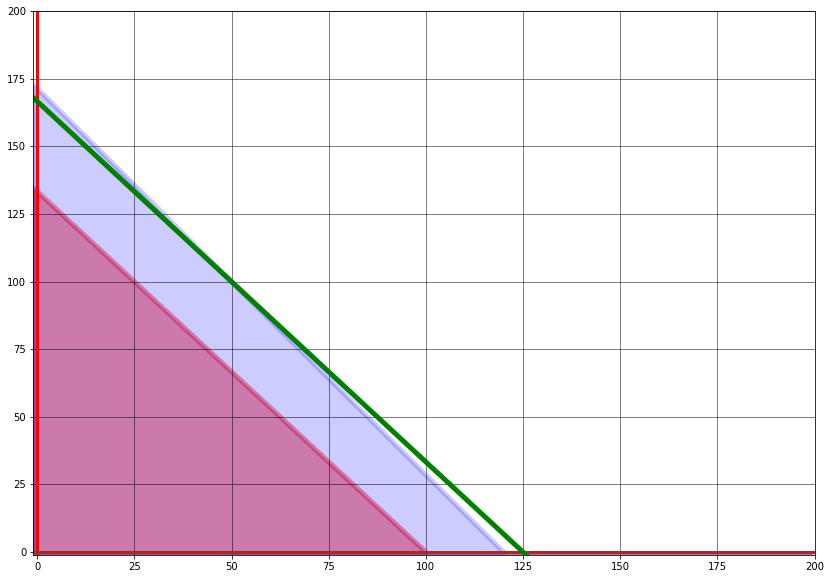

In [12]:
çizdir_maksimizasyon(a=50, b=100 , x_bottom=-1, y_bottom=-1 , x_top=200,y_top=200,rhs1=2000,x1a1=20,x2a1=15,
                         rhs2=6000,x1a2=50,x2a2=35,
                         amaça=20,amaçb=15)

###  Örnek 11

In [6]:
model = ConcreteModel()

model.r   = Var(domain=NonNegativeIntegers)
model.tr  = Var(domain=NonNegativeIntegers)

model.kazanç = Objective(expr = model.tr*20 + model.r*15, sense=maximize)
model.borç_oranı=Constraint(expr =model.tr*20 + model.r*15>=2000 )
model.nakit=Constraint(expr =  model.tr*50+model.r*35<=6000 )
model.r_hammadde=Constraint(expr =model.r <=100 )
model.tr_hammadde=Constraint(expr =model.tr <=100 )


model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()

print('kazanç:' ,model.kazanç())
print('r:',model.r())
print('tr:',model.tr())
SolverFactory('glpk').solve(model).write()
print('kazanç:' ,model.kazanç())
print('r:',model.r())
print('tr:',model.tr())

2 Var Declarations
    r : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeIntegers
    tr : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    kazanç : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 20*tr + 15*r

4 Constraint Declarations
    borç_oranı : Size=1, Index=None, Active=True
        Key  : Lower  : Body         : Upper : Active
        None : 2000.0 : 20*tr + 15*r :  +Inf :   True
    nakit : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper  : Active
        None :  -Inf : 50*tr + 35*r : 6000.0 :   True
    r_hammadde : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :    r : 100.0 :   True
    tr_hamma

### Sorular

#### Soru 1

optimal: [[ 400.]
 [-400.]]
amaç: 2500


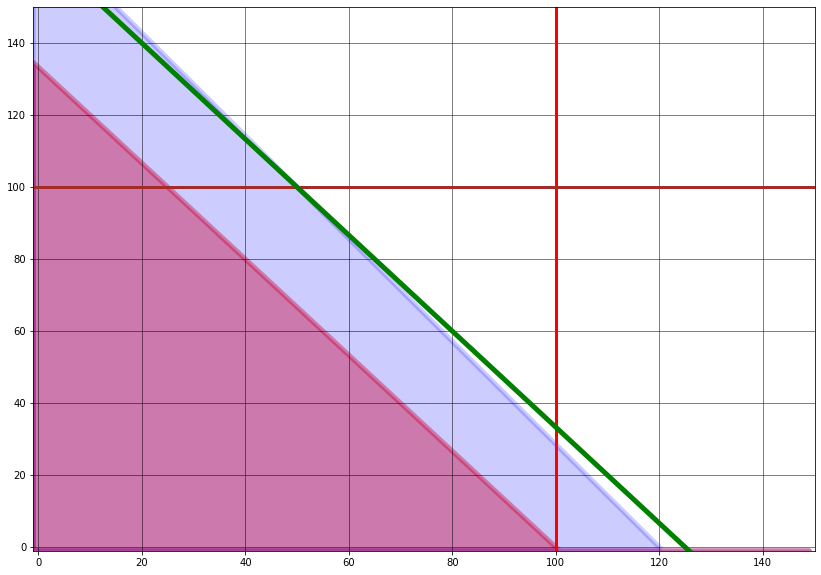

In [7]:
çizdir_maksimizasyon(a=50, b=100 , x_bottom=-1, y_bottom=-1 , x_top=150,y_top=150,rhs1=2000,x1a1=20,x2a1=15,
                         rhs2=6000,x1a2=50,x2a2=35,
                         amaça=20,amaçb=15,a_kısıt=100,
                        b_kısıt=100)

#### Soru 2

In [13]:
model = ConcreteModel()

model.r   = Var(domain=NonNegativeIntegers)
model.tr  = Var(domain=NonNegativeIntegers)

model.kazanç = Objective(expr = model.tr*20 + model.r*15, sense=maximize)
model.r_hammadde=Constraint(expr =model.r <=100 )
model.tr_hammadde=Constraint(expr =model.tr <=100 )
model.nakit=Constraint(expr =  model.tr*50+model.r*35<=6000 )
model.borç_oranı=Constraint(expr =model.tr*20 + model.r*15 >= 7000 )

#10000-model.tr*50-model.r*35 + 1000 + model.tr*100 + model.r*90 + 7000 - model.tr*30-model.r*40 +7000 >= 2*(10000-1000+7000)



model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()

# print('kazanç:' ,model.kazanç())
# print('r:',model.r())
# print('tr:',model.tr())
SolverFactory('glpk').solve(model).write()
# print('kazanç:' ,model.kazanç())
# print('r:',model.r())
# print('tr:',model.tr())

2 Var Declarations
    r : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeIntegers
    tr : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    kazanç : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 20*tr + 15*r

4 Constraint Declarations
    borç_oranı : Size=1, Index=None, Active=True
        Key  : Lower  : Body         : Upper : Active
        None : 7000.0 : 20*tr + 15*r :  +Inf :   True
    nakit : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper  : Active
        None :  -Inf : 50*tr + 35*r : 6000.0 :   True
    r_hammadde : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :    r : 100.0 :   True
    tr_hamma

optimal: [[-3100.]
 [ 4600.]]
amaç: 2500


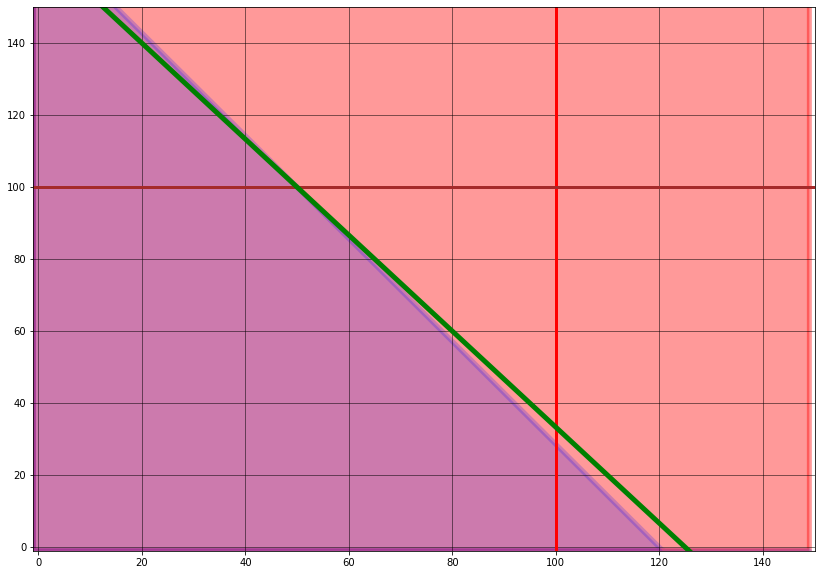

In [14]:
çizdir_maksimizasyon(a=50, b=100 , x_bottom=-1, y_bottom=-1 , x_top=150,y_top=150,rhs1=7000,x1a1=20,x2a1=15,
                         rhs2=6000,x1a2=50,x2a2=35,
                         amaça=20,amaçb=15,a_kısıt=100,
                        b_kısıt=100)

## Karışım Soruları

In [180]:
model = ConcreteModel()

indeks=[]
for i in range(1,4):
    for j in range(1,4):
        indeks.append((i,j))


model.A = Set(initialize=indeks)
model.değişken = Var(model.A, domain=NonNegativeIntegers)
model.g1_r   = Var(domain=NonNegativeIntegers)
model.g2_r   = Var(domain=NonNegativeIntegers)
model.g3_r   = Var(domain=NonNegativeIntegers)


In [181]:
#(ürün, hammadde)

In [182]:
model.değişken.pprint()

değişken : Size=9, Index=A
    Key    : Lower : Value : Upper : Fixed : Stale : Domain
    (1, 1) :     0 :  None :  None : False :  True : NonNegativeIntegers
    (1, 2) :     0 :  None :  None : False :  True : NonNegativeIntegers
    (1, 3) :     0 :  None :  None : False :  True : NonNegativeIntegers
    (2, 1) :     0 :  None :  None : False :  True : NonNegativeIntegers
    (2, 2) :     0 :  None :  None : False :  True : NonNegativeIntegers
    (2, 3) :     0 :  None :  None : False :  True : NonNegativeIntegers
    (3, 1) :     0 :  None :  None : False :  True : NonNegativeIntegers
    (3, 2) :     0 :  None :  None : False :  True : NonNegativeIntegers
    (3, 3) :     0 :  None :  None : False :  True : NonNegativeIntegers


In [183]:

kazanç=0
maliyet=0
üretim_adedi=0
g1_üretim=0
g2_üretim=0
g3_üretim=0
for i in range(1,4):
    for j in range(1,4):
        if i==1:
            kazanç+=70*model.değişken[(i,j)]
            g1_üretim+=model.değişken[(i,j)]
        if i==2:
            kazanç+=60*model.değişken[(i,j)]
            g2_üretim+=model.değişken[(i,j)]
        if i==3:
            kazanç+=50*model.değişken[(i,j)]
            g3_üretim+=model.değişken[(i,j)]
        if j==1:
            maliyet+=45*model.değişken[(i,j)]
        if j==2:
            maliyet+=35*model.değişken[(i,j)]
        if j==3:
            maliyet+=25*model.değişken[(i,j)]    
        
        üretim_adedi+=model.değişken[(i,j)]

In [184]:

model.kazanç = Objective(expr = kazanç - maliyet-4*üretim_adedi-model.g1_r-model.g2_r -model.g3_r  , sense=maximize)


In [185]:
model.kazanç.pprint()

kazanç : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : maximize : 70*değişken[1,1] + 70*değişken[1,2] + 70*değişken[1,3] + 60*değişken[2,1] + 60*değişken[2,2] + 60*değişken[2,3] + 50*değişken[3,1] + 50*değişken[3,2] + 50*değişken[3,3] - (45*değişken[1,1] + 35*değişken[1,2] + 25*değişken[1,3] + 45*değişken[2,1] + 35*değişken[2,2] + 25*değişken[2,3] + 45*değişken[3,1] + 35*değişken[3,2] + 25*değişken[3,3]) - 4*(değişken[1,1] + değişken[1,2] + değişken[1,3] + değişken[2,1] + değişken[2,2] + değişken[2,3] + değişken[3,1] + değişken[3,2] + değişken[3,3]) - g1_r - g2_r - g3_r


In [186]:
hammadde1=0
hammadde2=0
hammadde3=0

for i in range(1,4):
            hammadde1+=model.değişken[(i,1)]
            hammadde2+=model.değişken[(i,2)]
            hammadde3+=model.değişken[(i,3)]    

In [187]:

model.hammadde_c1=Constraint(expr = hammadde1 <=5000 )
model.hammadde_c2=Constraint(expr = hammadde2 <=5000 )
model.hammadde_c3=Constraint(expr = hammadde3 <=5000 )


In [188]:
oktan=[12,6,8]
sülfür=[0.5,2,3]

In [189]:
oktang1=0
oktang2=0
oktang3=0
sülfürg1=0
sülfürg2=0
sülfürg3=0
for j in range(1,4):
    oktang1+= oktan[j-1] *model.değişken[(1,j)]
    oktang2+= oktan[j-1] *model.değişken[(2,j)]
    oktang3+= oktan[j-1] *model.değişken[(3,j)]
    sülfürg1+=sülfür[j-1] *model.değişken[(1,j)]
    sülfürg2+=sülfür[j-1] *model.değişken[(2,j)]
    sülfürg3+=sülfür[j-1] *model.değişken[(3,j)]

In [190]:
model.oktan_g1=Constraint(expr = oktang1-g1_üretim*10 >=0 )
model.sülfür_g1=Constraint(expr = sülfürg1-g1_üretim <=0 )

model.oktan_g2=Constraint(expr = oktang2-g2_üretim*8 >=0 )
model.sülfür_g2=Constraint(expr = sülfürg2-g1_üretim*2 <=0 )

model.oktan_g3=Constraint(expr = oktang3-g3_üretim*6 >=0 )
model.sülfür_g3=Constraint(expr = sülfürg3-g3_üretim <=0 )

In [191]:

model.toplam_üretim=Constraint(expr = üretim_adedi <=14000 )

In [192]:

model.min_g1_üretim=Constraint(expr = g1_üretim-model.g1_r*10 >=3000 )

model.min_g2_üretim=Constraint(expr = g2_üretim-model.g2_r*10 >=2000 )

model.min_g3_üretim=Constraint(expr = g3_üretim-model.g3_r*10 >=1000 )

In [193]:


model.pprint()

SolverFactory('cbc',executable=path).solve(model).write()

# print('kazanç:' ,model.kazanç())
# print('r:',model.r())
# print('tr:',model.tr())
SolverFactory('glpk').solve(model).write()
# print('kazanç:' ,model.kazanç())
# print('r:',model.r())
# print('tr:',model.tr())

1 Set Declarations
    A : Dim=0, Dimen=2, Size=9, Domain=None, Ordered=False, Bounds=None
        [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

4 Var Declarations
    değişken : Size=9, Index=A
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 2) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 3) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (2, 1) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (2, 2) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (2, 3) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (3, 1) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (3, 2) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (3, 3) :     0 :  None :  None : False :  True : NonNegativeIntegers
    g1_r : Size=1, I

In [194]:
model.kazanç()

296761.0

In [195]:
g1_üretim()

6499.0

In [196]:
g2_üretim()

4332.0

In [197]:
g3_üretim()

1000.0

In [198]:
model.g1_r()


0.0

In [199]:
model.g2_r()

0.0

In [200]:
model.g3_r()

0.0

In [201]:
model.değişken[(1,1)]()+model.değişken[(2,1)]()+model.değişken[(3,1)]()

5000.0

In [202]:
model.değişken[(1,2)]()+model.değişken[(2,2)]()+model.değişken[(3,2)]()

2499.0

In [203]:
model.değişken[(1,3)]()+model.değişken[(2,3)]()+model.değişken[(3,3)]()

4332.0

### Sorular 

#### Grup A Soru 1  

In [298]:
ürün={'sert':{ 'fiyat':20,   'şeker':0,
                    'fındık':0.10,
                    'çikolata':0.10},
     'hafif':{ 'fiyat':25,   'şeker':0,
                    'fındık':0.20,
                    'çikolata':0}
     }

In [299]:
hammadde={
    'şeker':100,
    'fındık':20,
    'çikolata':30
    
}

In [302]:
m = ConcreteModel()

In [303]:
üretim = ürün.keys()
sarf = hammadde.keys()

In [304]:
m.değişken = Var(üretim,sarf, domain=NonNegativeReals)

In [305]:
m.değişken.pprint()

değişken : Size=6, Index=değişken_index
    Key                   : Lower : Value : Upper : Fixed : Stale : Domain
      ('hafif', 'fındık') :     0 :  None :  None : False :  True : NonNegativeReals
    ('hafif', 'çikolata') :     0 :  None :  None : False :  True : NonNegativeReals
       ('hafif', 'şeker') :     0 :  None :  None : False :  True : NonNegativeReals
       ('sert', 'fındık') :     0 :  None :  None : False :  True : NonNegativeReals
     ('sert', 'çikolata') :     0 :  None :  None : False :  True : NonNegativeReals
        ('sert', 'şeker') :     0 :  None :  None : False :  True : NonNegativeReals


In [306]:
kazanç = sum(sum(m.değişken[u,h]*ürün[u]['fiyat'] for h in sarf ) for  u in üretim)

In [307]:
m.amaç = Objective(expr = kazanç, sense=maximize)

In [308]:
m.kısıtlar = ConstraintList()

In [309]:
for u in üretim:
    for h in sarf:
        m.kısıtlar.add( m.değişken[u,h]-sum(m.değişken[u,h] for h in sarf)*ürün[u][h] >= 0)

In [310]:
for h in sarf:
        m.kısıtlar.add( sum(m.değişken[u,h] for u in üretim) <= hammadde[h])

In [311]:
m.pprint()

SolverFactory('cbc',executable=path).solve(m).write()

SolverFactory('glpk').solve(m).write()

4 Set Declarations
    değişken_index : Dim=0, Dimen=2, Size=6, Domain=None, Ordered=False, Bounds=None
        Virtual
    değişken_index_0 : Dim=0, Dimen=1, Size=2, Domain=None, Ordered=False, Bounds=None
        ['hafif', 'sert']
    değişken_index_1 : Dim=0, Dimen=1, Size=3, Domain=None, Ordered=False, Bounds=None
        ['fındık', 'çikolata', 'şeker']
    kısıtlar_index : Dim=0, Dimen=1, Size=9, Domain=None, Ordered=False, Bounds=None
        [1, 2, 3, 4, 5, 6, 7, 8, 9]

1 Var Declarations
    değişken : Size=6, Index=değişken_index
        Key                   : Lower : Value : Upper : Fixed : Stale : Domain
          ('hafif', 'fındık') :     0 :  None :  None : False :  True : NonNegativeReals
        ('hafif', 'çikolata') :     0 :  None :  None : False :  True : NonNegativeReals
           ('hafif', 'şeker') :     0 :  None :  None : False :  True : NonNegativeReals
           ('sert', 'fındık') :     0 :  None :  None : False :  True : NonNegativeReals
         ('sert', 'ç

In [312]:
m.amaç()

3250.0

In [313]:
kazanç = sum(sum(m.değişken[u,h]  for h in sarf ) for  u in üretim)

In [317]:
for  u in üretim:
    print(u,sum(m.değişken[u,h]()  for h in sarf ))
    

sert 100.0
hafif 50.0


In [318]:
for  h in sarf:
    print(h,sum(m.değişken[u,h]()  for u in üretim ))
    

şeker 100.0
fındık 20.0
çikolata 30.0


#### Grup A Soru 2  

In [335]:
ürün={'portakal suyu':{ 'kalite':8,'kazanç':1.5,'maliyet':1.05  },
     'portakal':{ 'kalite':7 ,'kazanç':.5,'maliyet':.2 }
     }

hammadde={9:100000,6:120000}
m = ConcreteModel()
üretim = ürün.keys()
sarf = hammadde.keys()
m.değişken = Var(üretim,sarf, domain=NonNegativeReals)

kazanç = sum(sum(m.değişken[u,h]*ürün[u]['kazanç'] for h in sarf ) for  u in üretim)
maliyet= sum(sum(m.değişken[u,h]*ürün[u]['maliyet'] for h in sarf ) for  u in üretim)

m.amaç = Objective(expr = kazanç-maliyet, sense=maximize)

m.kısıtlar = ConstraintList()

for u in üretim:
        m.kısıtlar.add( ürün[u]['kalite']*sum(m.değişken[u,h] for h in sarf) - sum( m.değişken[u,h]*h for  h in sarf) >=0)
        
for h in sarf:
        m.kısıtlar.add( sum(m.değişken[u,h] for u in üretim) <= hammadde[h])
        
m.pprint()

SolverFactory('cbc',executable=path).solve(m).write()

SolverFactory('glpk').solve(m).write()

print('amaç :' ,m.amaç())


print('kazanç :' ,kazanç())

print('maliyet :' ,maliyet())

for  u in üretim:
    print(u,sum(m.değişken[u,h]()  for h in sarf ))
    
for  h in sarf:
    print(h,sum(m.değişken[u,h]()  for u in üretim ))
    

4 Set Declarations
    değişken_index : Dim=0, Dimen=2, Size=4, Domain=None, Ordered=False, Bounds=None
        Virtual
    değişken_index_0 : Dim=0, Dimen=1, Size=2, Domain=None, Ordered=False, Bounds=None
        ['portakal', 'portakal suyu']
    değişken_index_1 : Dim=0, Dimen=1, Size=2, Domain=None, Ordered=False, Bounds=(6, 9)
        [6, 9]
    kısıtlar_index : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=False, Bounds=None
        [1, 2, 3, 4]

1 Var Declarations
    değişken : Size=4, Index=değişken_index
        Key                  : Lower : Value : Upper : Fixed : Stale : Domain
             ('portakal', 6) :     0 :  None :  None : False :  True : NonNegativeReals
             ('portakal', 9) :     0 :  None :  None : False :  True : NonNegativeReals
        ('portakal suyu', 6) :     0 :  None :  None : False :  True : NonNegativeReals
        ('portakal suyu', 9) :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    amaç : Size=1, Index=